In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (20, 15)

cryptocurrency='../data/raw/cryptocurrency/'
cryptocurrency_processed='../data/processed/cryptocurrency/'

If the two paths above do not work, please be sure the directories are created.

# Crypto data merging

First of all, we can see that we have a lot of currency datasets. The majority of this datasets have the same ending name 'price'. Lets see if we can merge them all in one csv in order to work in one go.

In [3]:
import glob
price_files = glob.glob(cryptocurrency+"*price.csv")
dfs = []
for price_file in price_files:
    df = pd.read_csv(price_file, index_col='Date')
    df['currency'] = currency_name = price_file.split('\\')[1].split('_price')[0]
    dfs.append(df)

In [4]:
for df in dfs:
    print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtyp

As we can see, all the csvs have the same columns and the rows can be selected using the currency column, so lets concat all the dataframes and export the dataframe into a csv.

In [5]:
df = pd.concat(dfs, ignore_index=False)
df.to_csv(cryptocurrency_processed+'prices.csv')

Now that prices are merged, lets see if we can merge the two files remaining, bitcoin_dataset and ethereum dataset.

In [6]:
dfbd = pd.read_csv(cryptocurrency+'bitcoin_dataset.csv', index_col='Date')
dfed = pd.read_csv(cryptocurrency+'ethereum_dataset.csv', index_col='Date(UTC)')

In [7]:
dfbd.columns

Index(['btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [8]:
dfed.columns

Index(['UnixTimeStamp', 'eth_etherprice', 'eth_tx', 'eth_address',
       'eth_supply', 'eth_marketcap', 'eth_hashrate', 'eth_difficulty',
       'eth_blocks', 'eth_uncles', 'eth_blocksize', 'eth_blocktime',
       'eth_gasprice', 'eth_gaslimit', 'eth_gasused', 'eth_ethersupply',
       'eth_chaindatasize', 'eth_ens_register'],
      dtype='object')

As we can see it's impossible to merge this two datasets toghether, then we will need to analyse them by separate

# Prices analysis

In order to start the analysis over the cryptocurrency dataset, we will start by the currency prices.

First of all we will reload the prices dataset

In [9]:
dfp = pd.read_csv(cryptocurrency_processed+'prices.csv', index_col='Date')

Lets visualize the price data

In [10]:
dfp.head()

,Open,High,Low,Close,Volume,Market Cap,currency
Date,,,,,,,
"Sep 05, 2017",514.90,550.95,458.78,541.71,"338,978,000","8,527,100,000",bitcoin_cash
"Sep 04, 2017",608.26,608.26,500.75,517.24,"328,957,000","10,072,200,000",bitcoin_cash
"Sep 03, 2017",578.27,617.41,563.59,607.43,"344,862,000","9,574,520,000",bitcoin_cash
"Sep 02, 2017",621.96,642.05,560.58,575.90,"350,478,000","10,297,000,000",bitcoin_cash
"Sep 01, 2017",588.40,645.52,586.73,622.17,"393,839,000","9,740,460,000",bitcoin_cash


In [11]:
dfp.describe()

,Open,High,Low,Close
count,10902.000000,10902.000000,10902.000000,10902.000000
mean,108.128991,111.604493,104.903597,108.582433
std,361.141176,373.066746,350.049136,363.397395
min,0.000086,0.000089,0.000079,0.000086
25%,0.188584,0.201342,0.178492,0.188905
50%,2.820000,2.940000,2.700000,2.825000
75%,15.155000,15.937500,14.325000,15.267500
max,4901.420000,4975.040000,4678.530000,4892.010000


In [12]:
dfp.index

Index(['Sep 05, 2017', 'Sep 04, 2017', 'Sep 03, 2017', 'Sep 02, 2017',
       'Sep 01, 2017', 'Aug 31, 2017', 'Aug 30, 2017', 'Aug 29, 2017',
       'Aug 28, 2017', 'Aug 27, 2017',
       ...
       'Jun 11, 2016', 'Jun 10, 2016', 'Jun 09, 2016', 'Jun 08, 2016',
       'Jun 07, 2016', 'Jun 06, 2016', 'Jun 05, 2016', 'Jun 04, 2016',
       'Jun 03, 2016', 'Jun 02, 2016'],
      dtype='object', name='Date', length=10902)

We can see that the index data is not in the date format, we will assign the correct type.

In [13]:
dfp.index = pd.to_datetime(dfp.index)

dfp.sort_index(ascending=True, inplace=True)

dfp.head()

,Open,High,Low,Close,Volume,Market Cap,currency
Date,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,1500520000,bitcoin
2013-04-28,4.30,4.40,4.18,4.35,-,73773400,litecoin
2013-04-29,4.37,4.57,4.23,4.38,-,74952700,litecoin
2013-04-29,134.44,147.49,134.00,144.54,-,1491160000,bitcoin
2013-04-30,4.40,4.57,4.17,4.30,-,75726800,litecoin


In [14]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10902 entries, 2013-04-28 to 2017-09-05
Data columns (total 7 columns):
Open          10902 non-null float64
High          10902 non-null float64
Low           10902 non-null float64
Close         10902 non-null float64
Volume        10902 non-null object
Market Cap    10902 non-null object
currency      10902 non-null object
dtypes: float64(4), object(3)
memory usage: 681.4+ KB


Here we can see that volume has values that are not numeric, let's see if this happen in all the columns

In [15]:
df = dfp[dfp.applymap(np.isreal)]

In [16]:
len(df) - df.count()

Open              0
High              0
Low               0
Close             0
Volume        10902
Market Cap    10902
currency      10902
dtype: int64

We can see that not only the volume had non numeric values, but also the market cap column (currency column are strings, so it's obvious).

In [17]:
dfp.loc[df.index].Volume.unique()

array(['-', '46862700', '148,422', ..., '111,430,000', '6,194,560',
       '338,978,000'], dtype=object)

We can see that the volume data not only has a dash, but also others string formats of data, like numbers separated using a comma. We will interpret this commas as separators between every three numbers, like: 3,000,000 -> 3000000

In [18]:
dfp.Volume = dfp.Volume.apply(lambda x: x.replace(",", ""))

In [19]:
len(dfp[dfp.Volume == '-']), len(dfp)

(631, 10902)

This means that ~6% of the data contains this dash, so the question is, is it worth maintaining this value?
- A 6% of the data is big enough to contain a specific case in the data. Saving this data is worth it.
- If we want to completely delete this dash, we can delete the row or interpolate the data of the previous and future days in order to have an accurate value.

In this case, the dash exists on the first rows of the dataframe, then predicting an accurate value would require of forecasting methods (and even with them it could be bad predicted). Then in this case we need to delete them.

In [20]:
dfp.Volume = dfp.Volume.astype('str')

In [21]:
dfp.drop(dfp[dfp.Volume=='-'].index, inplace=True)

In [22]:
dfp.Volume = dfp.Volume.astype(np.float64)

In [23]:
dfp.describe()

,Open,High,Low,Close,Volume
count,10271.000000,10271.000000,10271.000000,10271.000000,1.027100e+04
mean,108.826911,112.165828,105.781142,109.248712,5.425286e+07
std,368.658279,380.607669,357.664924,370.953744,2.315639e+08
min,0.000086,0.000089,0.000079,0.000086,6.900000e+01
25%,0.185605,0.196858,0.176754,0.186486,1.506265e+05
50%,2.750000,2.880000,2.630000,2.760000,1.536850e+06
75%,13.510000,14.190000,12.860000,13.580000,1.518975e+07
max,4901.420000,4975.040000,4678.530000,4892.010000,3.764240e+09


In [24]:
dfp['Market Cap'].unique()

array(['9295570000', '190,964,000', '602608000', ..., '852,870,000',
       '467,862,000', '8,527,100,000'], dtype=object)

We can see how the same happens in this case, there are comas separating the numbers, as in the Volume column. Let's change that.

In [25]:
dfp['Market Cap'] = dfp['Market Cap'].apply(lambda x: x.replace(",", ""))

In [26]:
dfp.loc[dfp['Market Cap'] == '-'].head()

,Open,High,Low,Close,Volume,Market Cap,currency
Date,,,,,,,
2015-08-07,2.830000,3.54,2.520000,2.770000,164329.0,-,ethereum
2016-06-02,1.330000,1.39,1.150000,1.210000,83734.0,-,waves
2016-06-03,1.290000,1.66,0.727579,1.090000,57721.0,-,waves
2016-06-04,1.090000,1.29,0.575898,0.586993,4912.0,-,waves
2016-06-05,0.587588,1.11,0.580745,0.713006,41700.0,-,waves


We can see how market cap also has the dashes. We will drop them again, in order to prevent risk (also there are not a lot of those values).

In [27]:
dfp.drop(dfp[dfp['Market Cap']=='-'].index, inplace=True)

In [28]:
dfp['Market Cap'] = dfp['Market Cap'].astype(np.float64)

In [29]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9436 entries, 2013-12-27 to 2017-09-05
Data columns (total 7 columns):
Open          9436 non-null float64
High          9436 non-null float64
Low           9436 non-null float64
Close         9436 non-null float64
Volume        9436 non-null float64
Market Cap    9436 non-null float64
currency      9436 non-null object
dtypes: float64(6), object(1)
memory usage: 589.8+ KB


We have transformed the dataset, now we contain the data that we need/want. Save it and continue the exploration

In [30]:
dfp.to_csv(cryptocurrency_processed+'prices_processed.csv')

Now let's see if there are exagerated values that may be outliers in our data

In [31]:
dfp.describe()

,Open,High,Low,Close,Volume,Market Cap
count,9436.000000,9436.000000,9436.000000,9436.000000,9.436000e+03,9.436000e+03
mean,109.734749,113.143489,106.698900,110.212071,5.590104e+07,2.171676e+09
std,371.205370,383.450523,360.211814,373.755882,2.375417e+08,6.519173e+09
min,0.000086,0.000089,0.000079,0.000086,6.900000e+01,6.417620e+05
25%,0.192899,0.206236,0.181793,0.193487,1.505490e+05,2.254395e+07
50%,2.725000,2.860000,2.615000,2.740000,1.507940e+06,1.586180e+08
75%,14.102500,14.977500,13.347500,14.235000,1.567858e+07,8.648980e+08
max,4901.420000,4975.040000,4678.530000,4892.010000,3.764240e+09,8.106060e+10


We see that the percentiles in our data say that our values on the 75% have value of more or less 15, but we can see that the max value is around 5000, lets see if that has sense

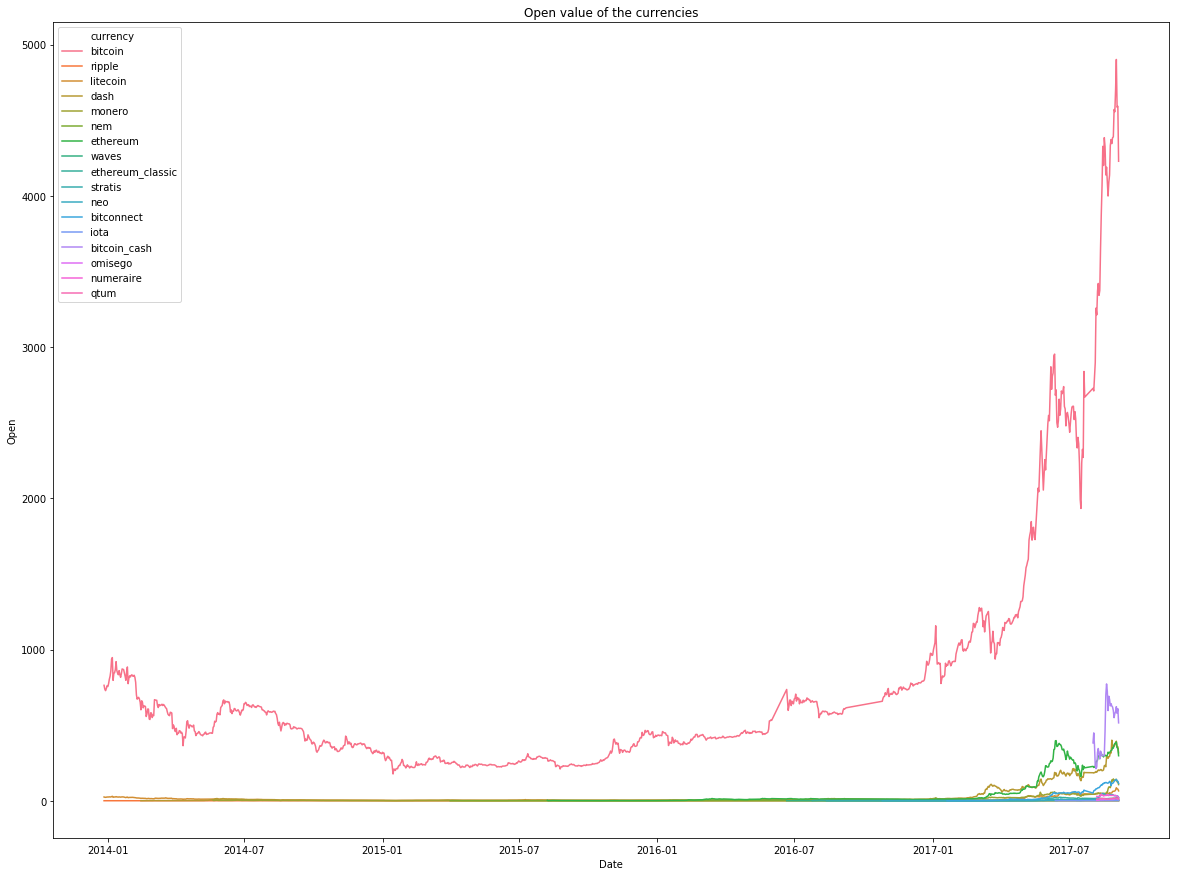

In [32]:
sns.lineplot(x=dfp.index, y='Open', hue='currency', data=dfp)
plt.title('Open value of the currencies');

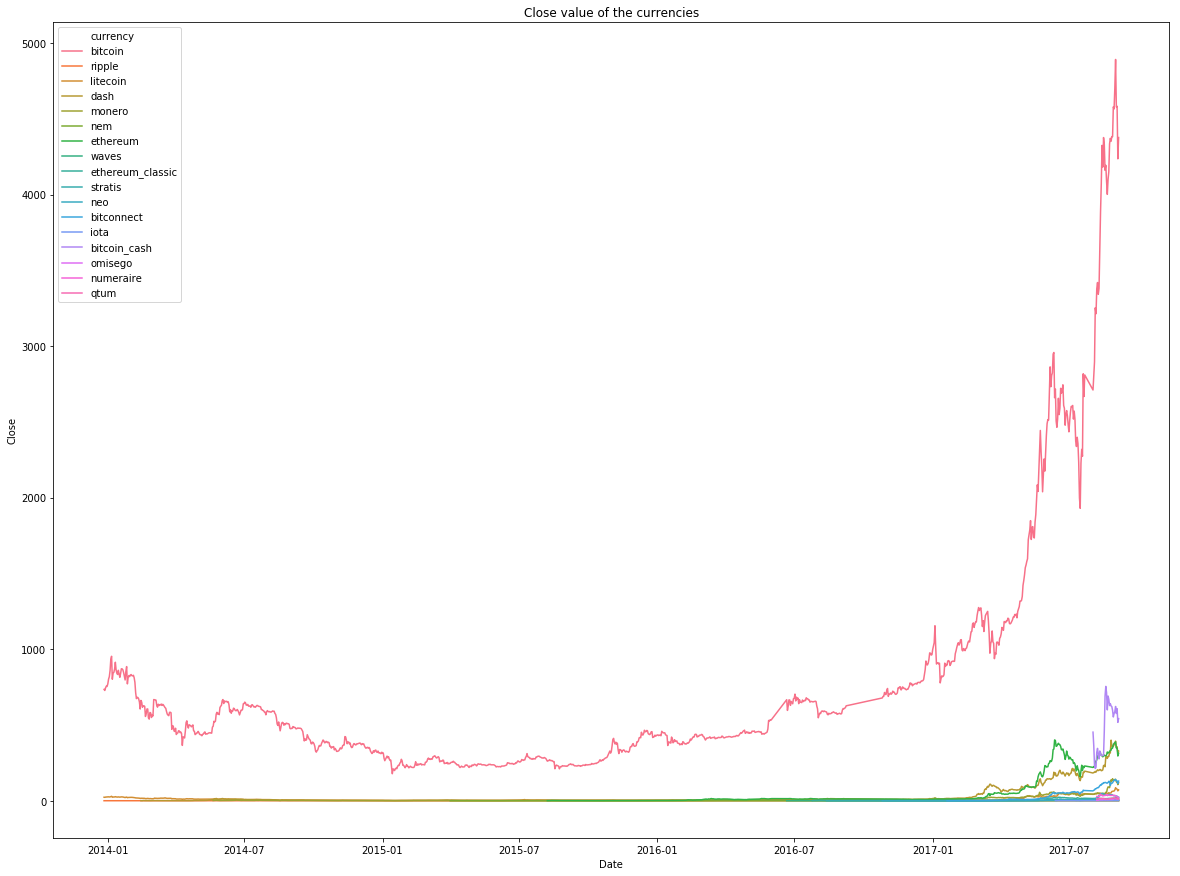

In [33]:
sns.lineplot(x=dfp.index, y='Close', hue='currency', data=dfp)
plt.title('Close value of the currencies');

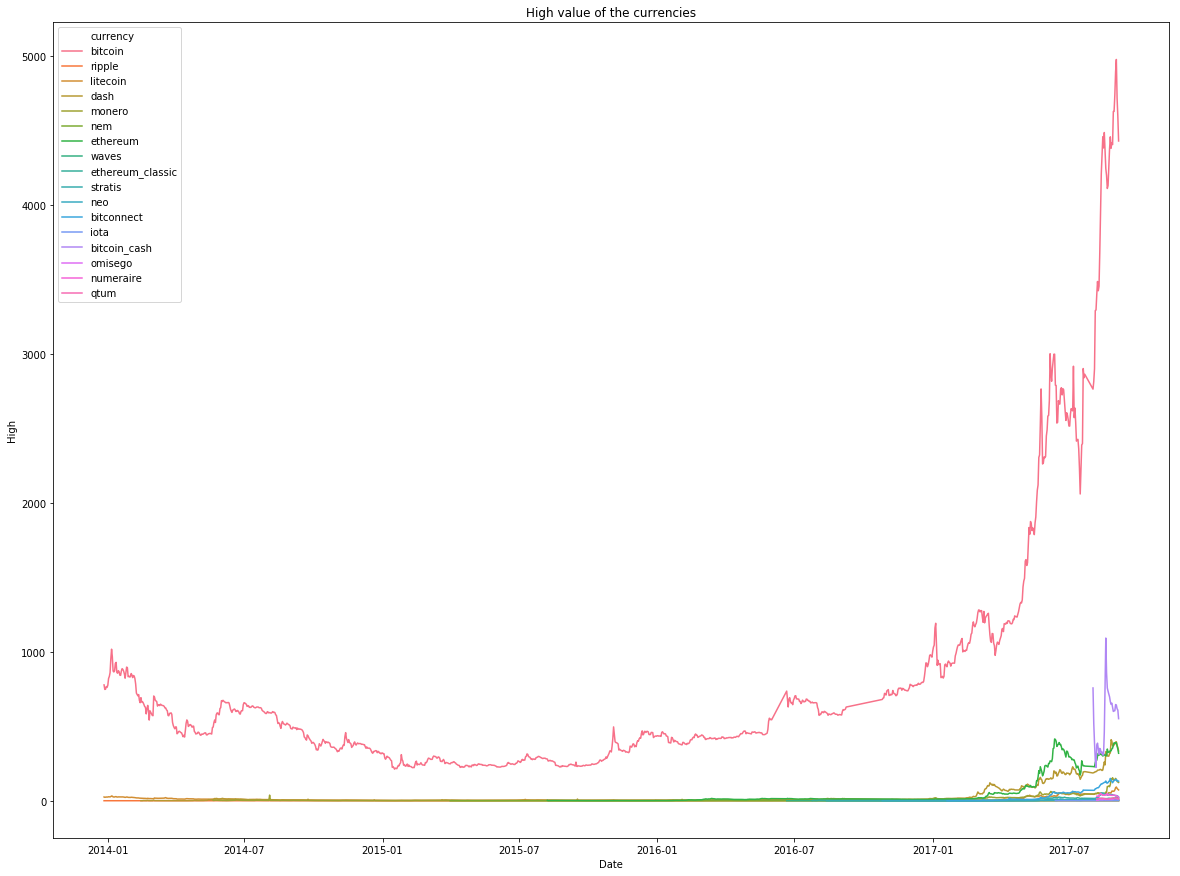

In [34]:
sns.lineplot(x=dfp.index, y='High', hue='currency', data=dfp)
plt.title('High value of the currencies');

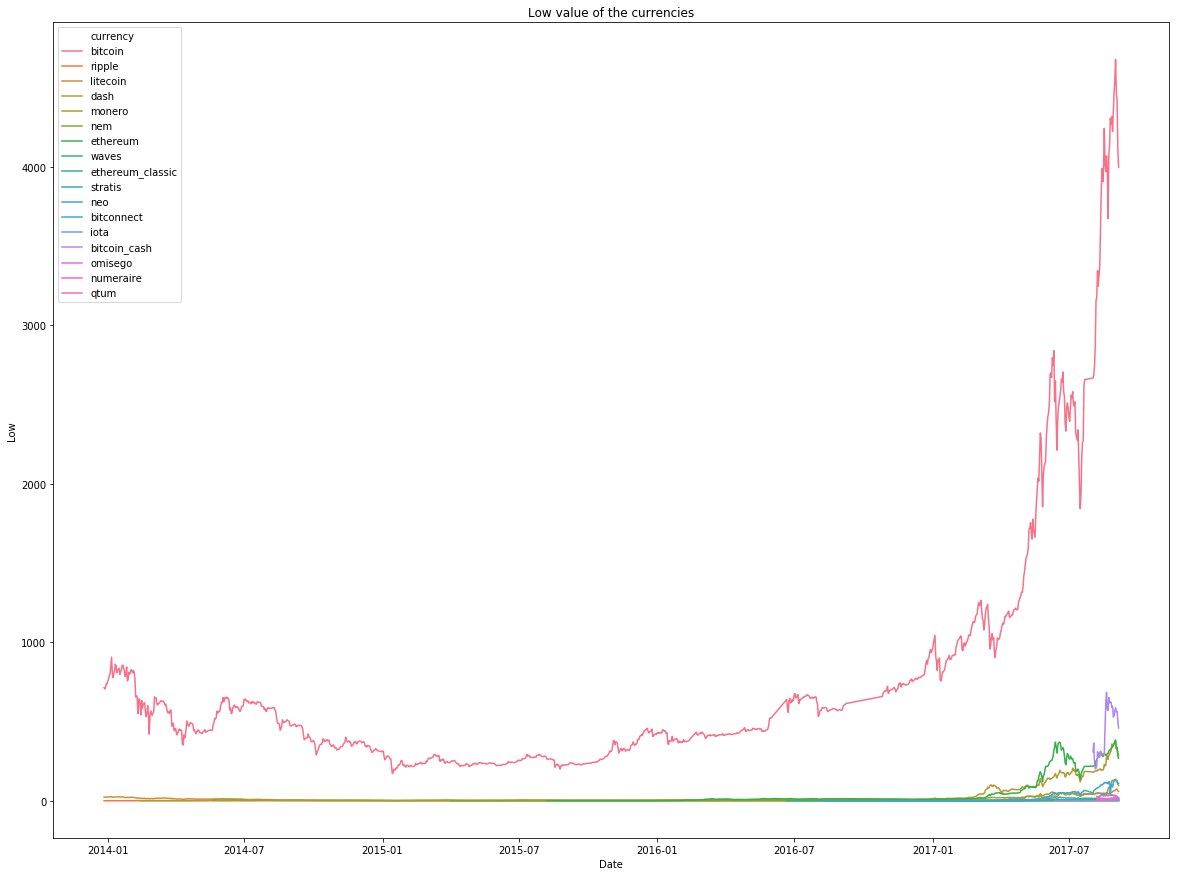

In [35]:
sns.lineplot(x=dfp.index, y='Low', hue='currency', data=dfp)
plt.title('Low value of the currencies');

As we can see, those values made sense in general terms, just because they indicate that the trend of the currency prices was really high. We can correlate that high value with the cryptocurrency BOOM at 2017 (The most identifiable is the bitcoin currency).

Also we can see how there are some currencies that started in the middle of the BOOM, for instance the lowest ones. For example:

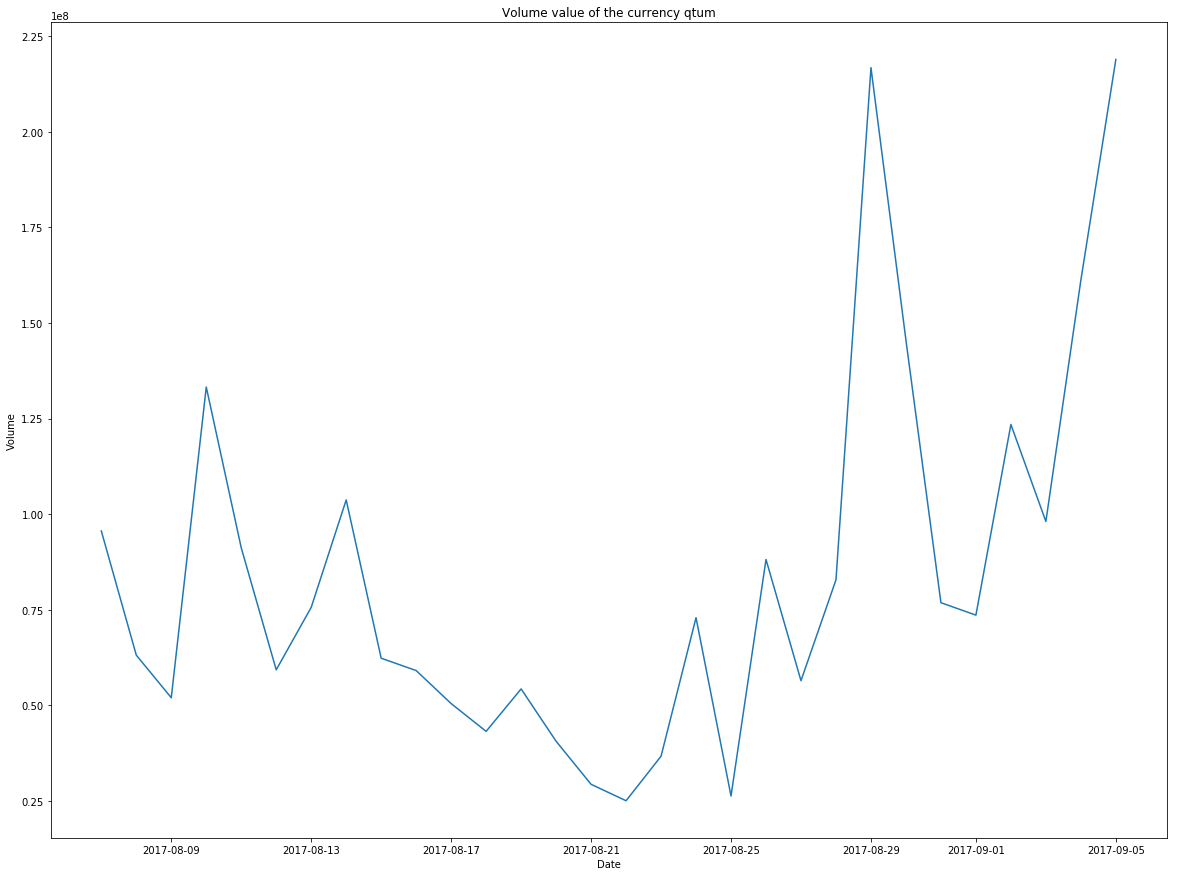

In [36]:
sns.lineplot(x=dfp.loc[dfp.currency=='qtum'].index, y='Volume', data=dfp.loc[dfp.currency=='qtum'])
plt.title('Volume value of the currency qtum');

In [37]:
for curren in dfp.currency.unique():
    print('Currency', curren,'start:  ', dfp.loc[dfp.currency == curren].index[0])

Currency bitcoin start:   2013-12-27 00:00:00
Currency ripple start:   2013-12-27 00:00:00
Currency litecoin start:   2013-12-27 00:00:00
Currency dash start:   2014-02-14 00:00:00
Currency monero start:   2014-05-21 00:00:00
Currency nem start:   2015-04-01 00:00:00
Currency ethereum start:   2015-08-08 00:00:00
Currency waves start:   2016-06-21 00:00:00
Currency ethereum_classic start:   2016-07-25 00:00:00
Currency stratis start:   2016-08-13 00:00:00
Currency neo start:   2016-10-26 00:00:00
Currency bitconnect start:   2017-01-20 00:00:00
Currency iota start:   2017-06-13 00:00:00
Currency bitcoin_cash start:   2017-08-02 00:00:00
Currency omisego start:   2017-08-07 00:00:00
Currency numeraire start:   2017-08-07 00:00:00
Currency qtum start:   2017-08-07 00:00:00


We can see here how old is a currency, even the ethereum fork, between ethereum and ethereum classic.

Finally, let's save the files into separate csvs

In [ ]:
for curren in dfp.currency.unique():
    dfp.loc[dfp.currency == curren].to_csv('processed_'+curren+'.csv')

# Now the datasets of bitcoin and ethereum

In [38]:
dfbd = pd.read_csv(cryptocurrency+'bitcoin_dataset.csv', index_col='Date')
dfed = pd.read_csv(cryptocurrency+'ethereum_dataset.csv', index_col='Date(UTC)')

Lets start on the **bitcoin** dataset

In [39]:
dfbd.index = pd.to_datetime(dfbd.index)

dfbd.sort_index(ascending=True, inplace=True)

dfbd.head()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-03,0.0,50.0,0.0,0.0,0.0,0.000285,0.0,1.0,0.0,4.971027e-08,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,50.0,0.0,0.0
2009-01-05,0.0,50.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2009-01-07,0.0,50.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2009-01-09,0.0,750.0,0.0,0.0,0.0,0.000215,0.0,1.0,0.0,6.959438e-07,...,0.0,0.0,14.0,14.0,15.0,14.0,14.0,700.0,0.0,0.0
2009-01-11,0.0,7600.0,0.0,0.0,0.0,0.000215,0.0,1.0,0.0,5.269289e-06,...,0.0,0.0,106.0,106.0,152.0,106.0,106.0,5300.0,0.0,0.0


In [40]:
dfbd.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,1584.000000,1.584000e+03,1.584000e+03,1.106000e+03,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1.584000e+03,...,1.584000e+03,1584.000000,1584.000000,1584.000000,1.584000e+03,1584.000000,1584.000000,1.584000e+03,1.584000e+03,1.584000e+03
mean,334.095935,9.858289e+06,5.045619e+09,7.163810e+06,25575.157921,0.275350,0.332702,524.398118,6.325609,5.922701e+05,...,1.936839e+03,9.991641,146279.104167,79702.557449,4.995044e+07,73023.962121,48678.102273,1.341287e+06,1.754802e+05,8.198947e+07
std,609.052564,5.170361e+06,9.932860e+09,1.825481e+07,35584.788312,0.323961,0.803367,624.657294,5.235022,1.311404e+06,...,4.483039e+04,12.749557,175945.983749,93616.287421,6.764581e+07,93160.749994,62017.952608,2.349160e+06,2.430975e+05,1.749650e+08
min,0.000000,5.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.897500,5.609512e+06,4.942691e+06,0.000000e+00,10.000000,0.004050,0.000000,12.000000,0.000000,4.656278e-01,...,1.089992e+00,2.015895,2829.000000,2046.750000,3.124270e+05,2046.750000,1539.500000,1.733491e+05,5.297075e+04,4.475075e+04
50%,97.235000,1.111709e+07,1.105880e+09,2.695221e+05,7364.000000,0.133423,0.000000,287.500000,7.400000,7.760397e+01,...,2.571138e+00,6.592404,53019.000000,49466.000000,1.725231e+07,24052.500000,22898.000000,8.295208e+05,1.493515e+05,1.516898e+07
75%,446.337500,1.435121e+07,6.437710e+09,6.763820e+06,38520.750000,0.446481,0.000000,792.000000,9.316667,3.738849e+05,...,6.787051e+00,10.758279,237152.500000,115646.250000,7.468435e+07,108932.750000,61813.500000,1.801741e+06,2.449880e+05,8.279745e+07
max,4748.255000,1.654439e+07,7.851738e+10,1.984916e+08,131365.560971,0.998177,5.000000,2235.977273,47.733333,8.215055e+06,...,1.570000e+06,90.202095,687290.000000,367710.000000,2.520994e+08,354151.000000,256495.000000,4.599222e+07,5.313161e+06,1.422580e+09


In [41]:
dfbd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1584 entries, 2009-01-03 to 2017-09-04
Data columns (total 23 columns):
btc_market_price                                       1584 non-null float64
btc_total_bitcoins                                     1584 non-null float64
btc_market_cap                                         1584 non-null float64
btc_trade_volume                                       1106 non-null float64
btc_blocks_size                                        1584 non-null float64
btc_avg_block_size                                     1584 non-null float64
btc_n_orphaned_blocks                                  1584 non-null float64
btc_n_transactions_per_block                           1584 non-null float64
btc_median_confirmation_time                           1584 non-null float64
btc_hash_rate                                          1584 non-null float64
btc_difficulty                                         1584 non-null float64
btc_miners_revenue          

We can see that the btc_trade_volume column has fewer instances

In [42]:
dfbd[dfbd.btc_trade_volume.isna() == True].btc_trade_volume

Date
2011-06-20   NaN
2011-06-22   NaN
2011-06-24   NaN
2013-09-17   NaN
2013-09-19   NaN
2013-09-21   NaN
2013-09-23   NaN
2013-09-25   NaN
2013-09-27   NaN
2013-09-29   NaN
2013-10-01   NaN
2013-10-03   NaN
2013-10-05   NaN
2013-10-07   NaN
2013-10-09   NaN
2013-10-11   NaN
2013-10-13   NaN
2013-10-15   NaN
2013-10-17   NaN
2013-10-19   NaN
2013-10-21   NaN
2013-10-23   NaN
2013-10-25   NaN
2013-10-27   NaN
2014-05-09   NaN
2014-05-11   NaN
2014-05-13   NaN
2014-05-15   NaN
2014-05-17   NaN
2014-05-19   NaN
              ..
2017-07-08   NaN
2017-07-10   NaN
2017-07-12   NaN
2017-07-14   NaN
2017-07-16   NaN
2017-07-18   NaN
2017-07-20   NaN
2017-07-22   NaN
2017-07-24   NaN
2017-07-26   NaN
2017-07-28   NaN
2017-07-30   NaN
2017-08-01   NaN
2017-08-03   NaN
2017-08-05   NaN
2017-08-07   NaN
2017-08-09   NaN
2017-08-11   NaN
2017-08-13   NaN
2017-08-15   NaN
2017-08-17   NaN
2017-08-19   NaN
2017-08-21   NaN
2017-08-23   NaN
2017-08-25   NaN
2017-08-27   NaN
2017-08-29   NaN
2017-08-3

The length of null data in this case is 478, and it's a relevant number. We could delete the column, but the column might contain relevant data. We have two options, do a substituation using a metric, or putting the value to -1, in order to indicate that this data is not relevant.

We decided to substitute the NaN data for a value -1 in this case.

In [43]:
dfbd.btc_trade_volume.fillna(-1, inplace=True)

Let's see if the other instanses also have them

In [44]:
for instance in dfbd.columns:
    print(len(dfbd[dfbd[instance].isna() == True]))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


There are no more nulls in the dataset

In order to see if there are outliers, lets do a pairplot in order to cluster the detect them.

As we have a lot of columns, we will save the plot in the same notebook document in order to see the plot better.

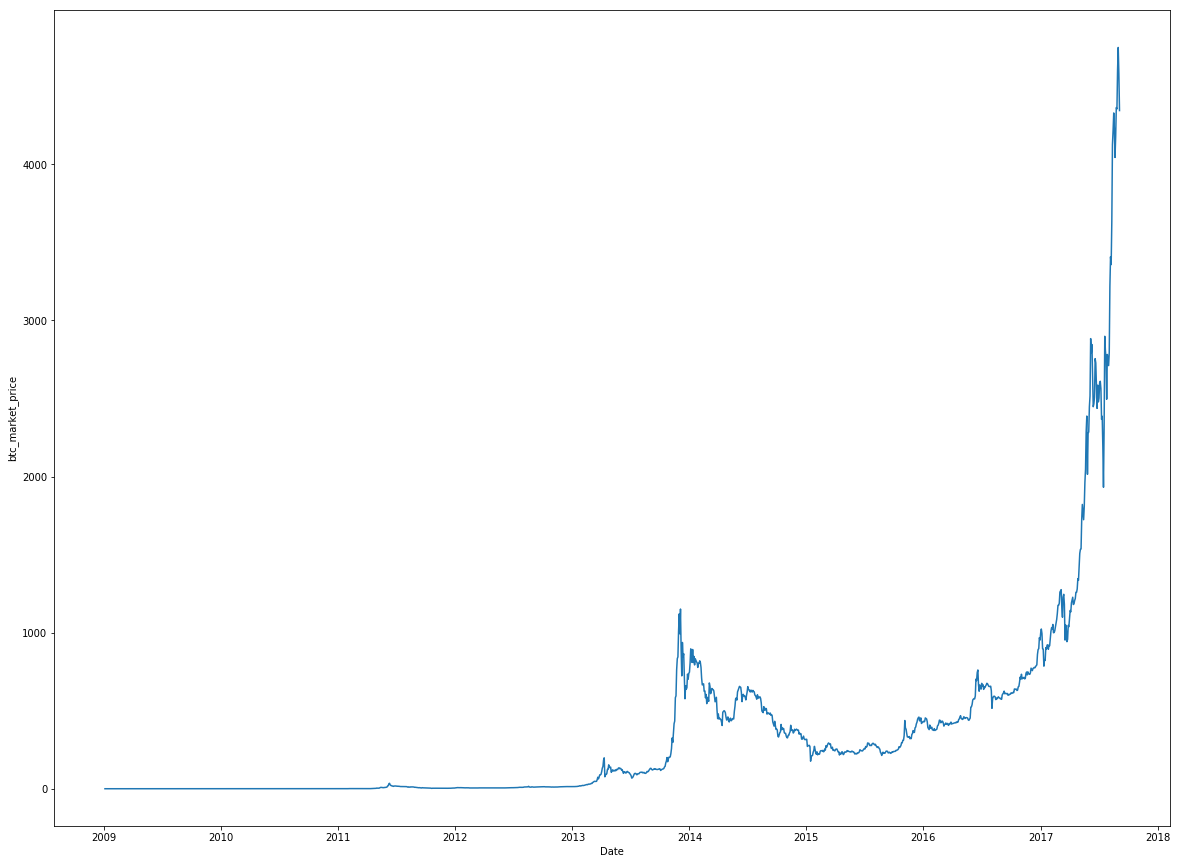

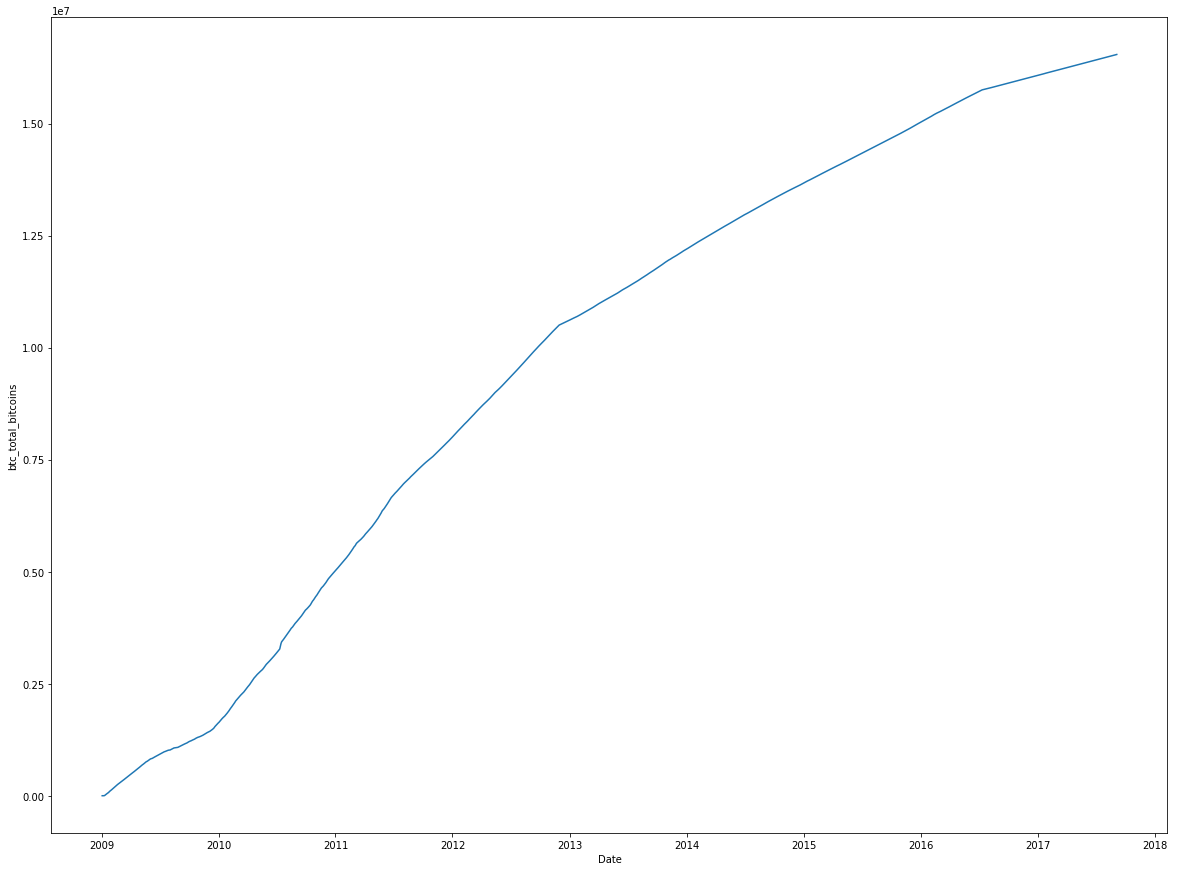

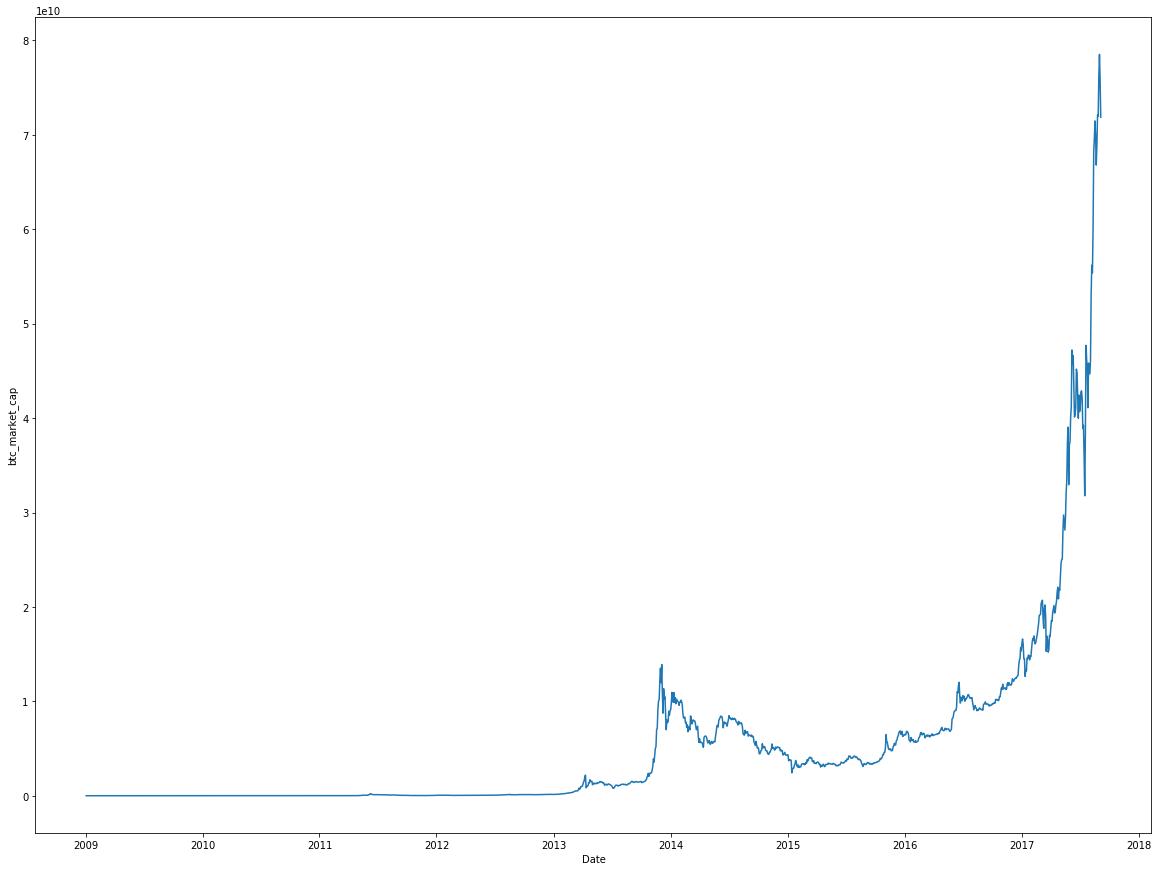

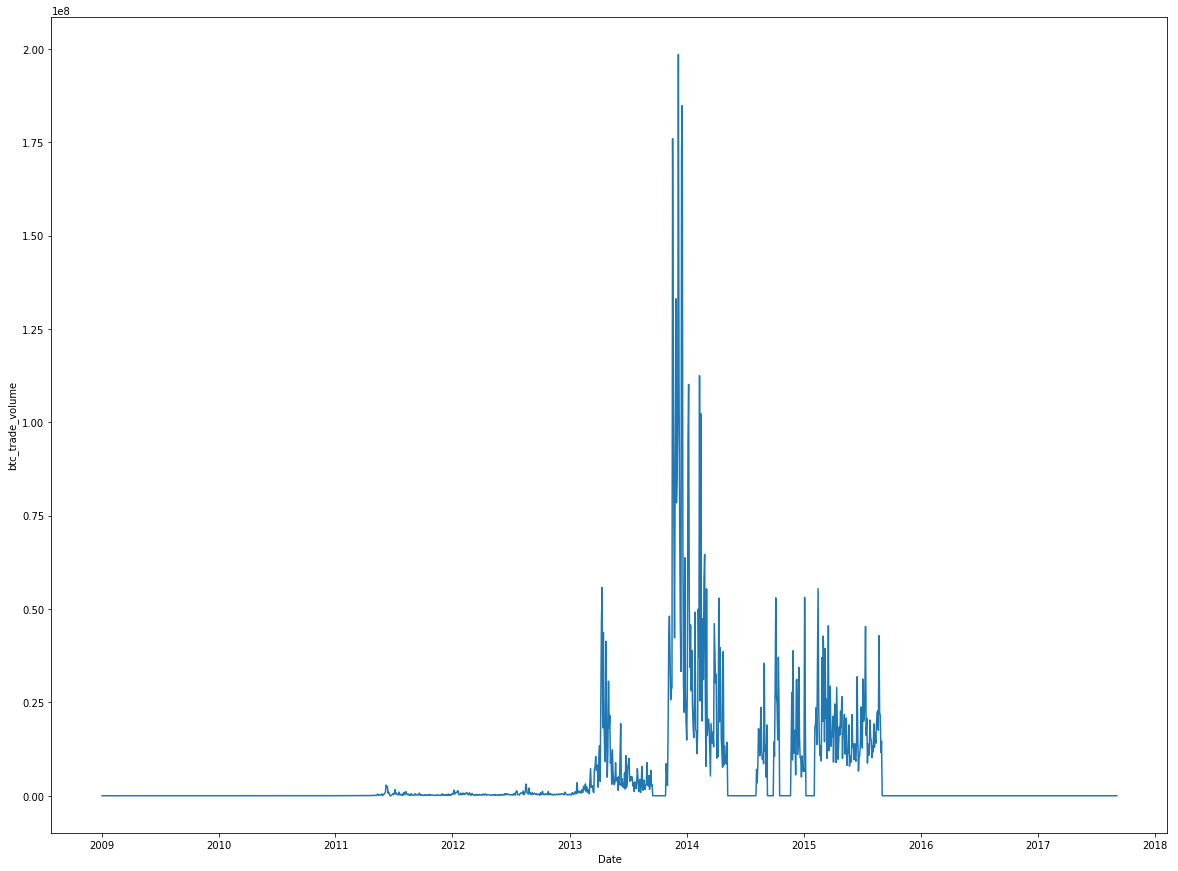

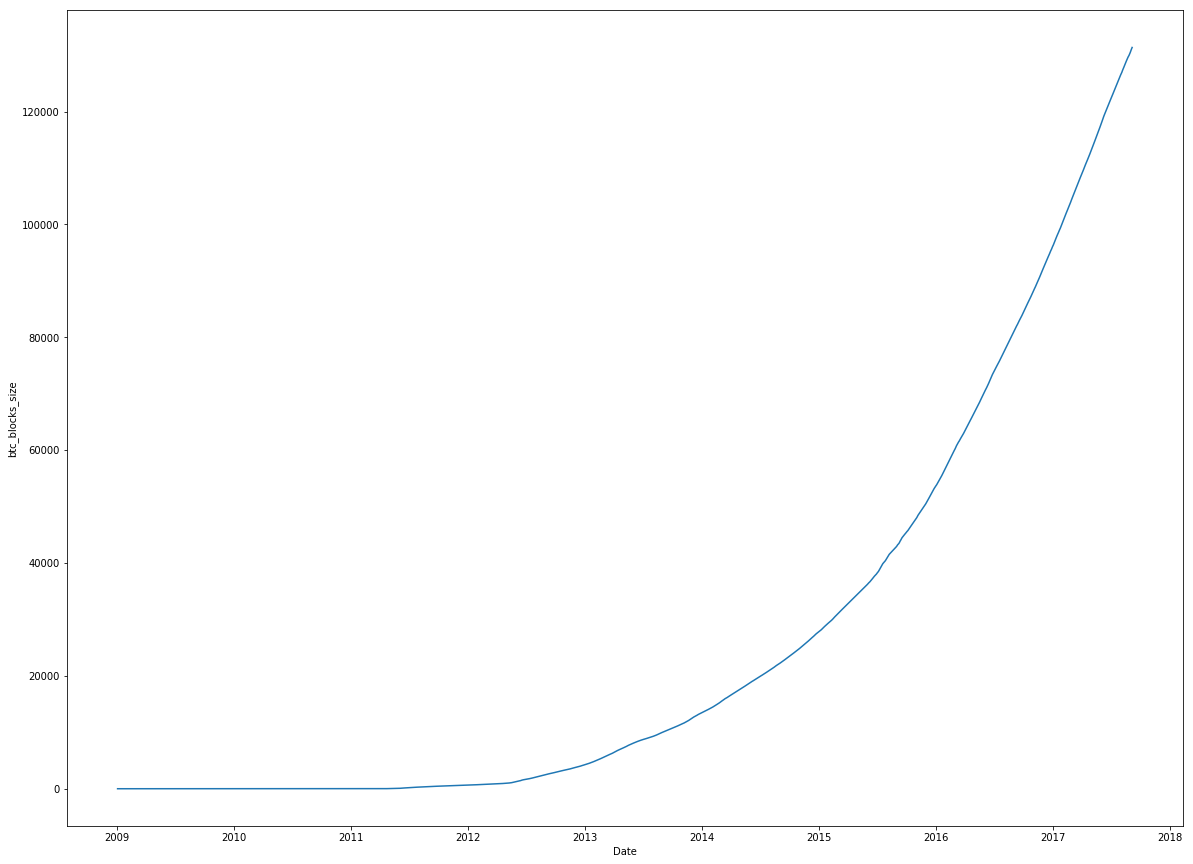

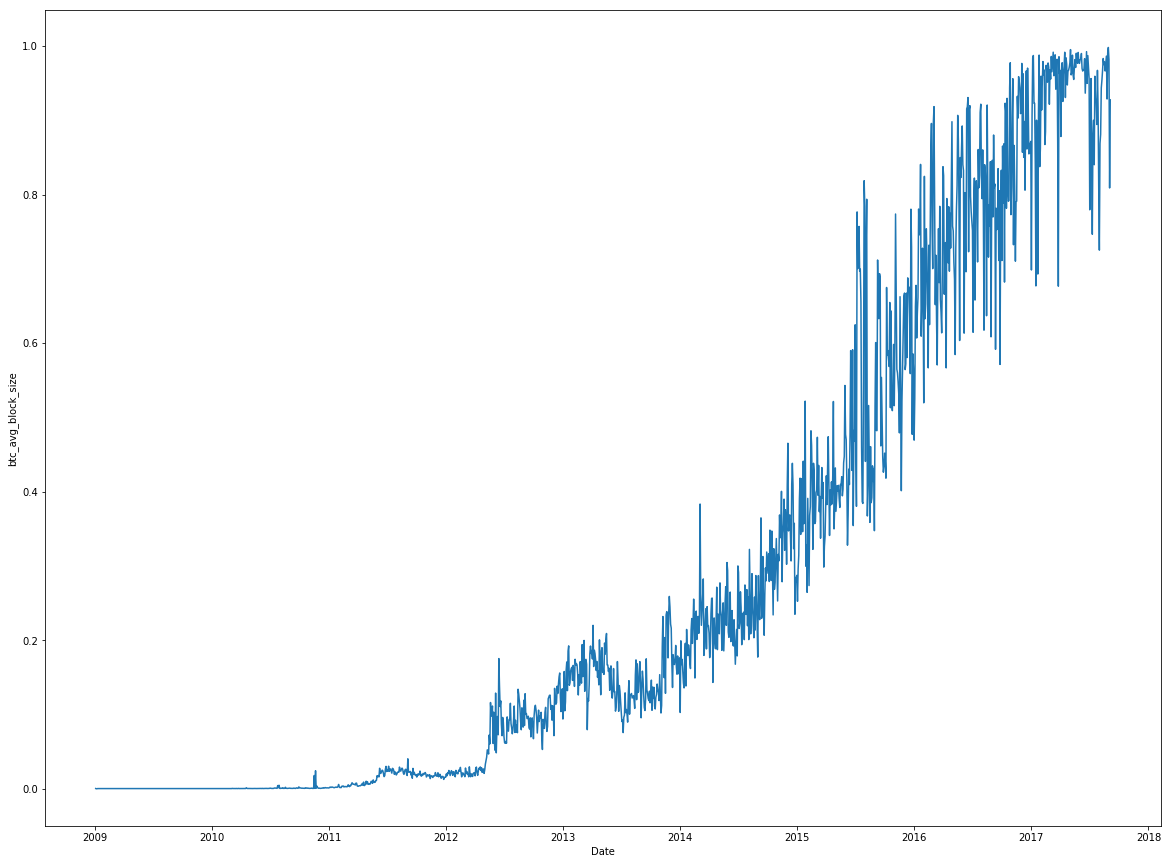

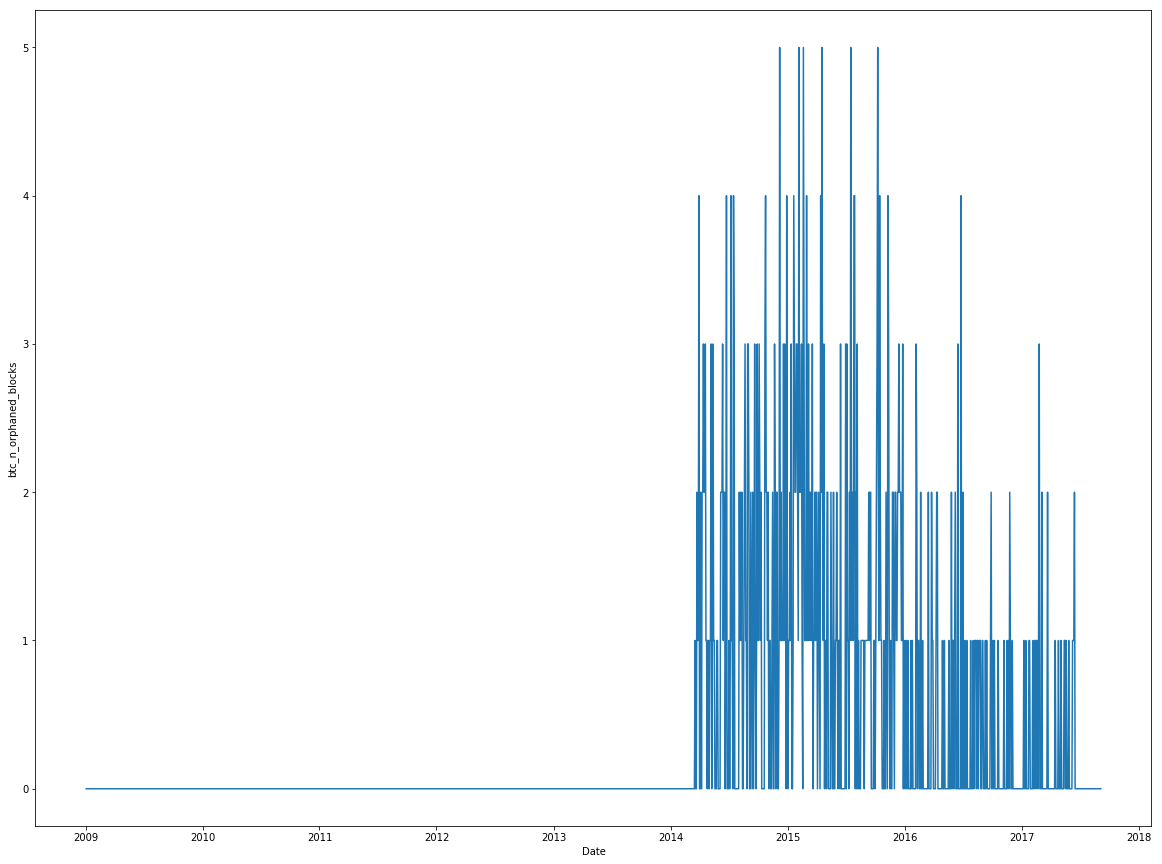

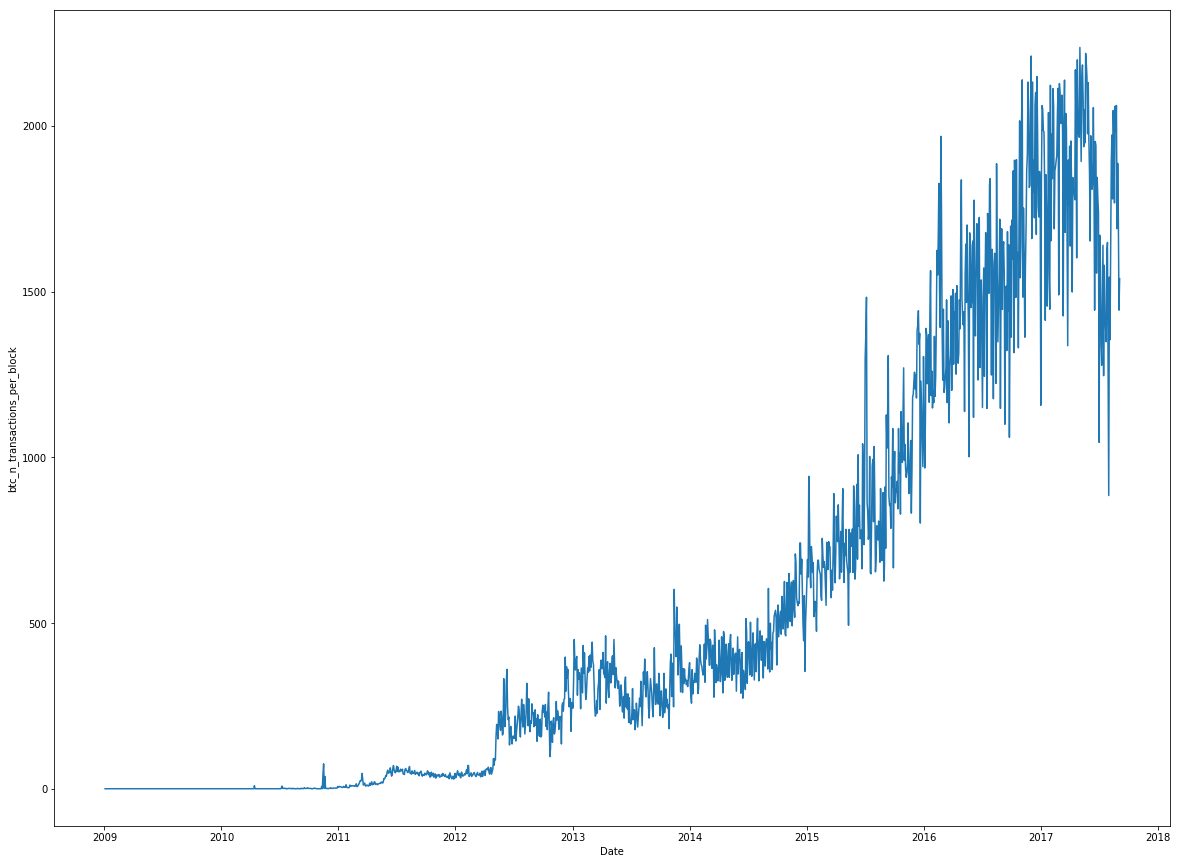

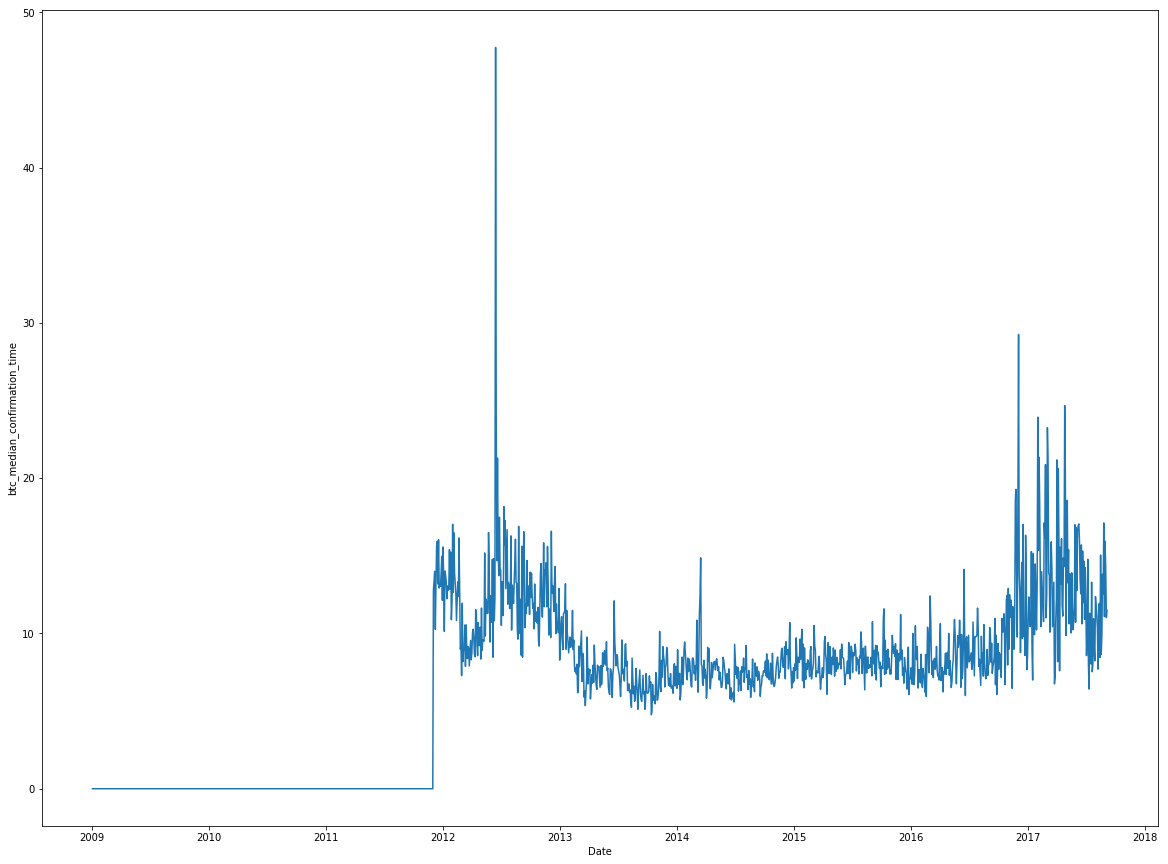

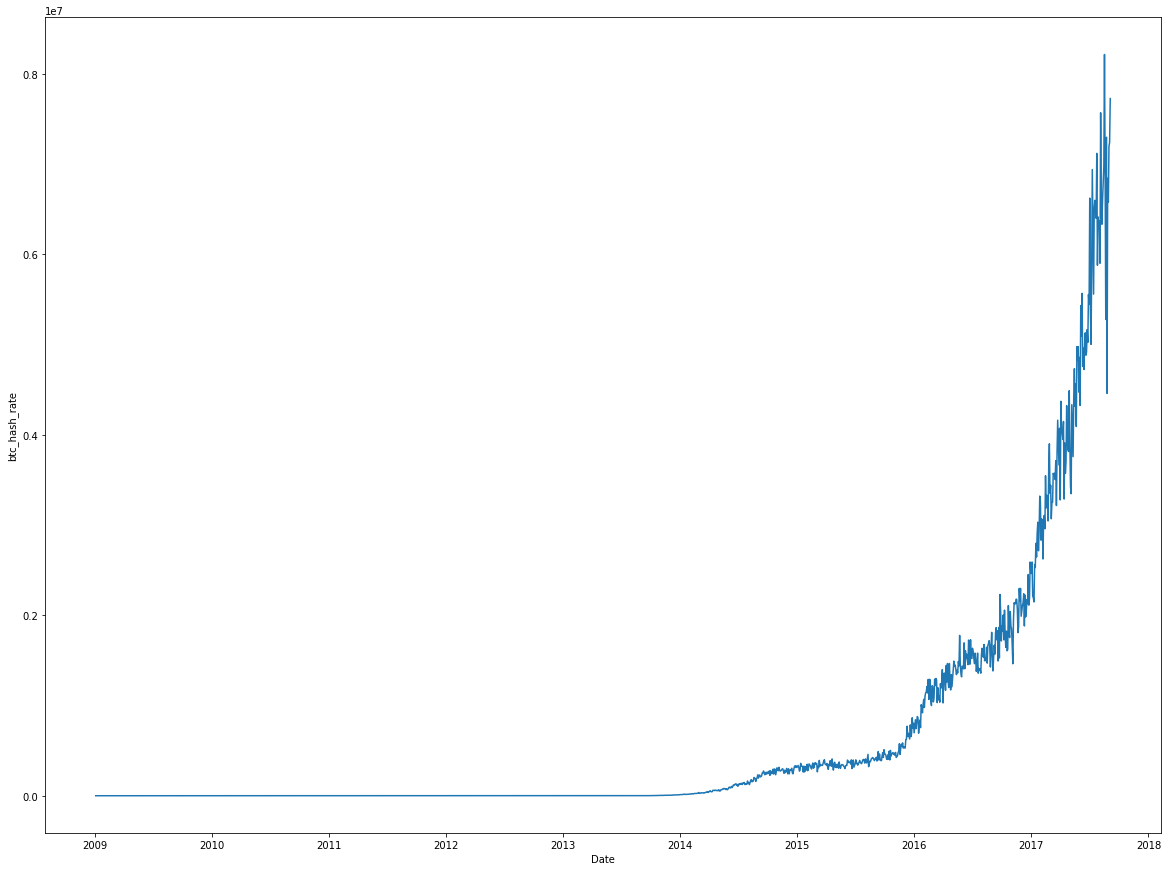

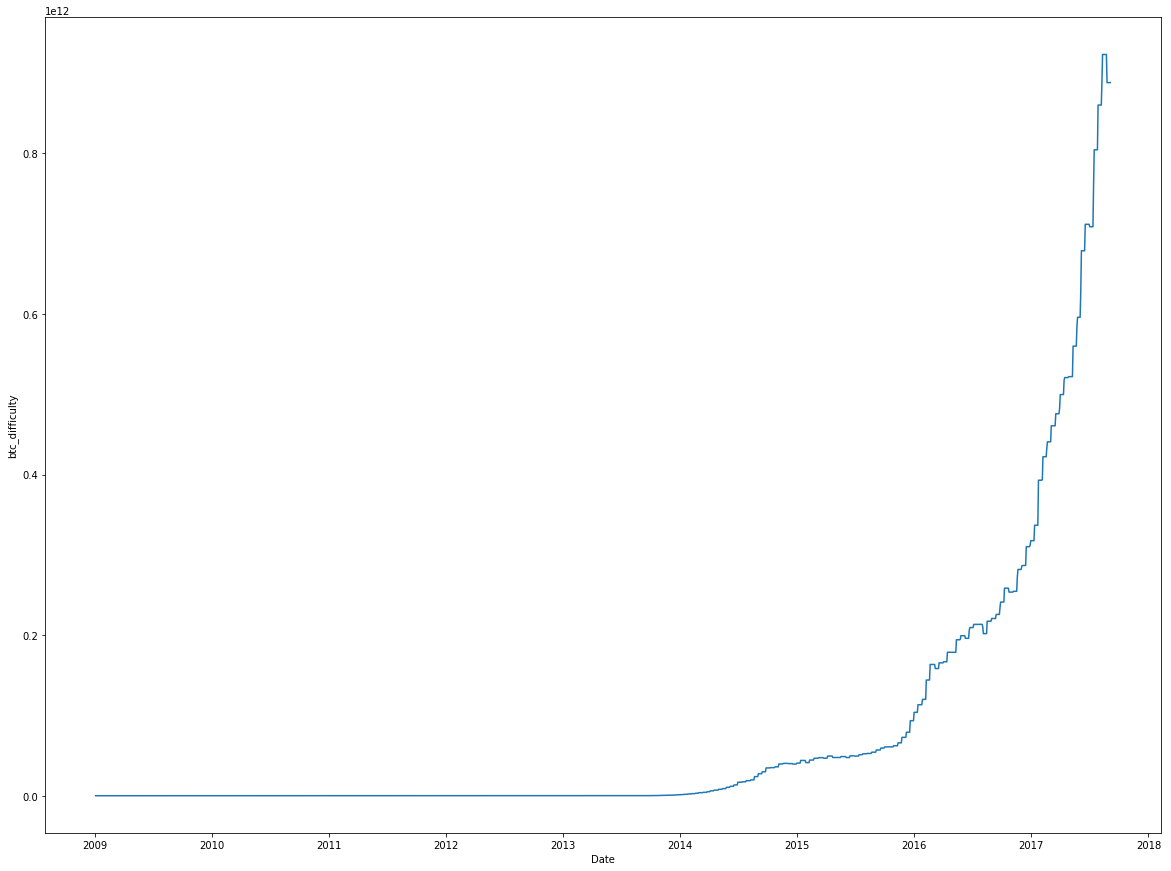

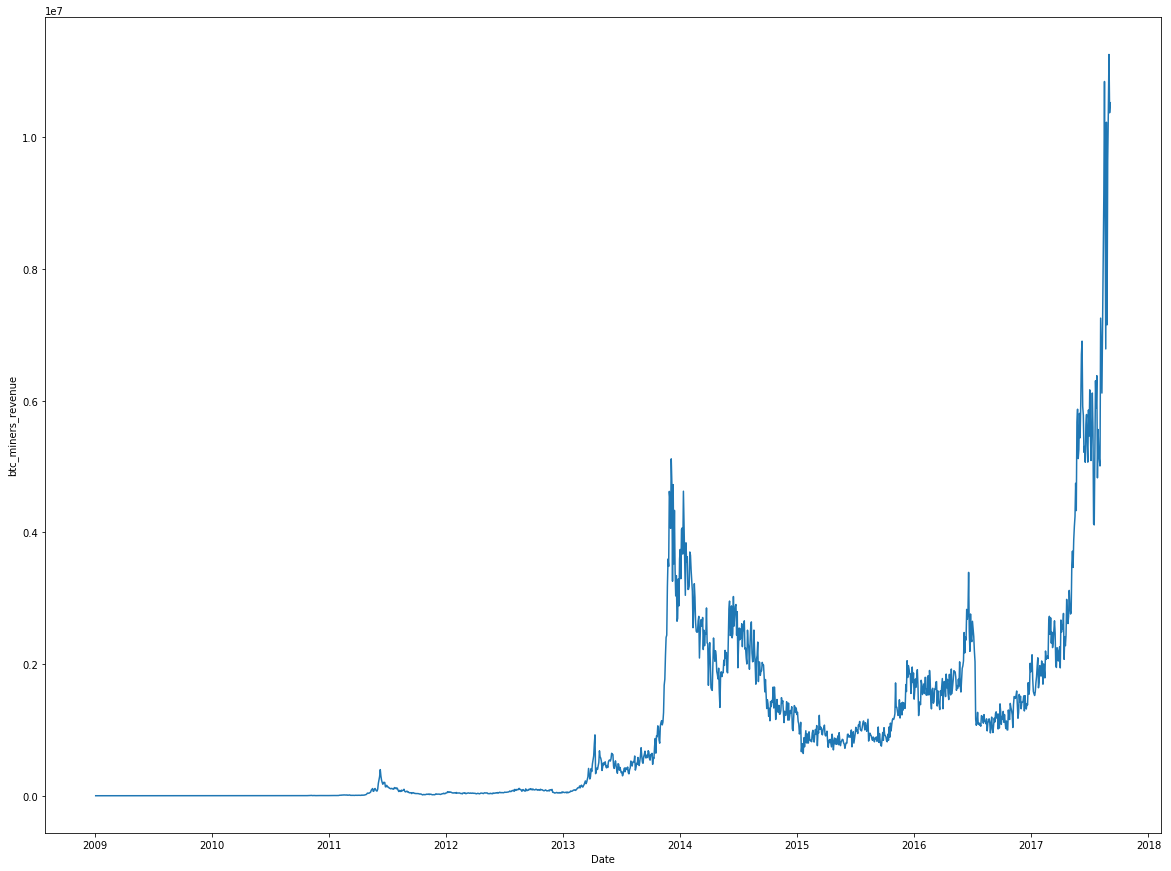

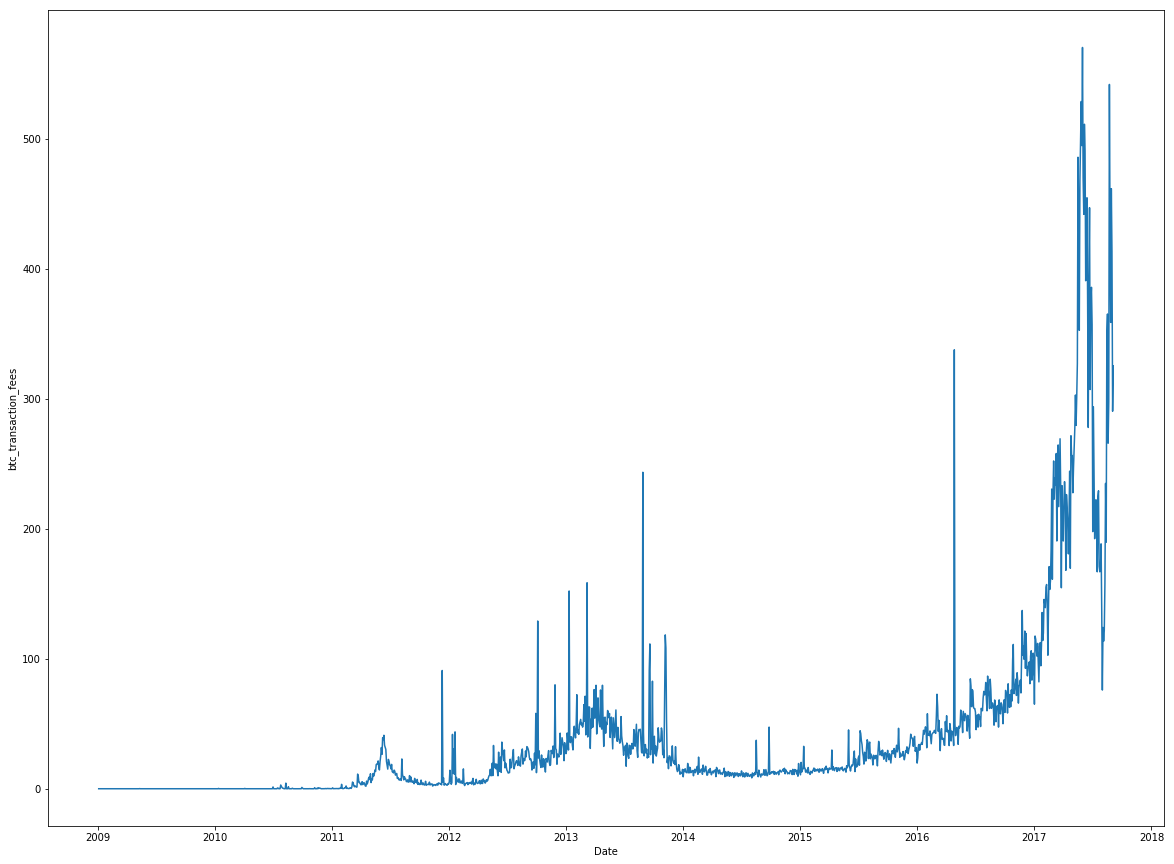

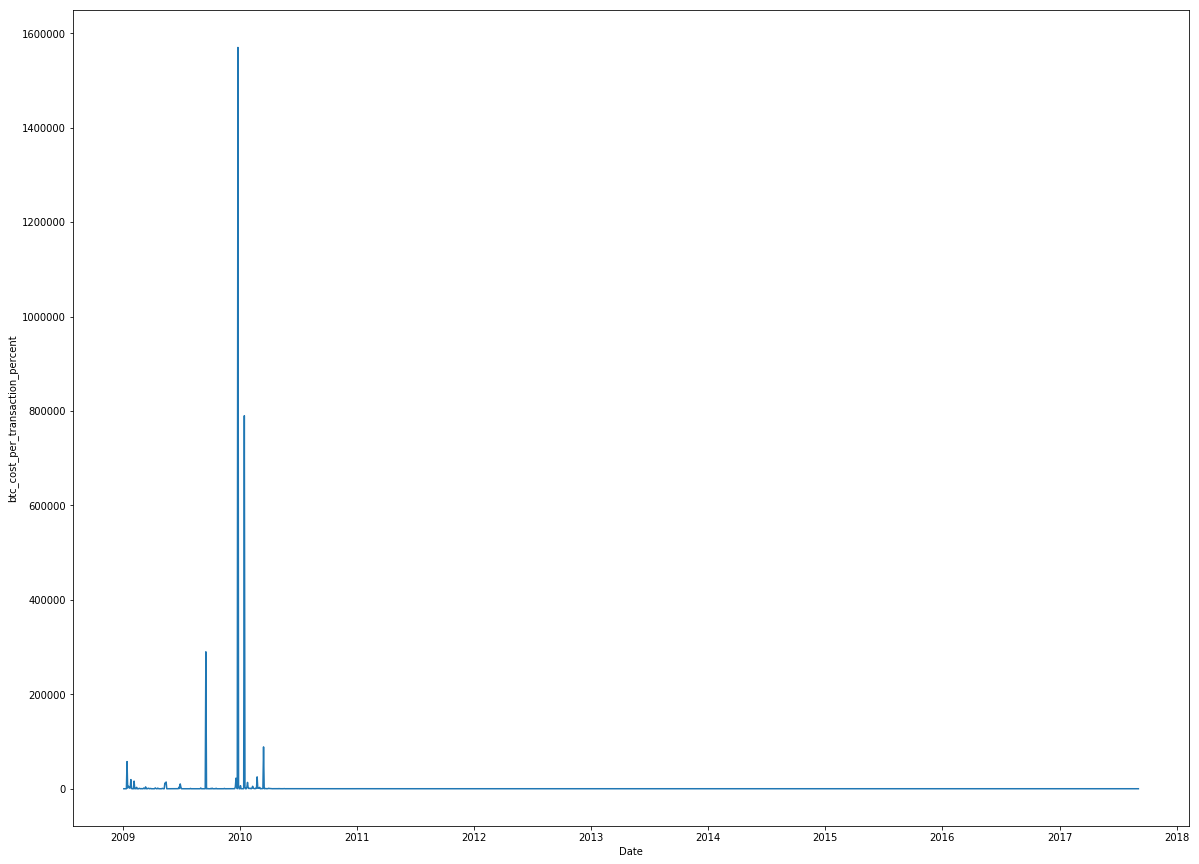

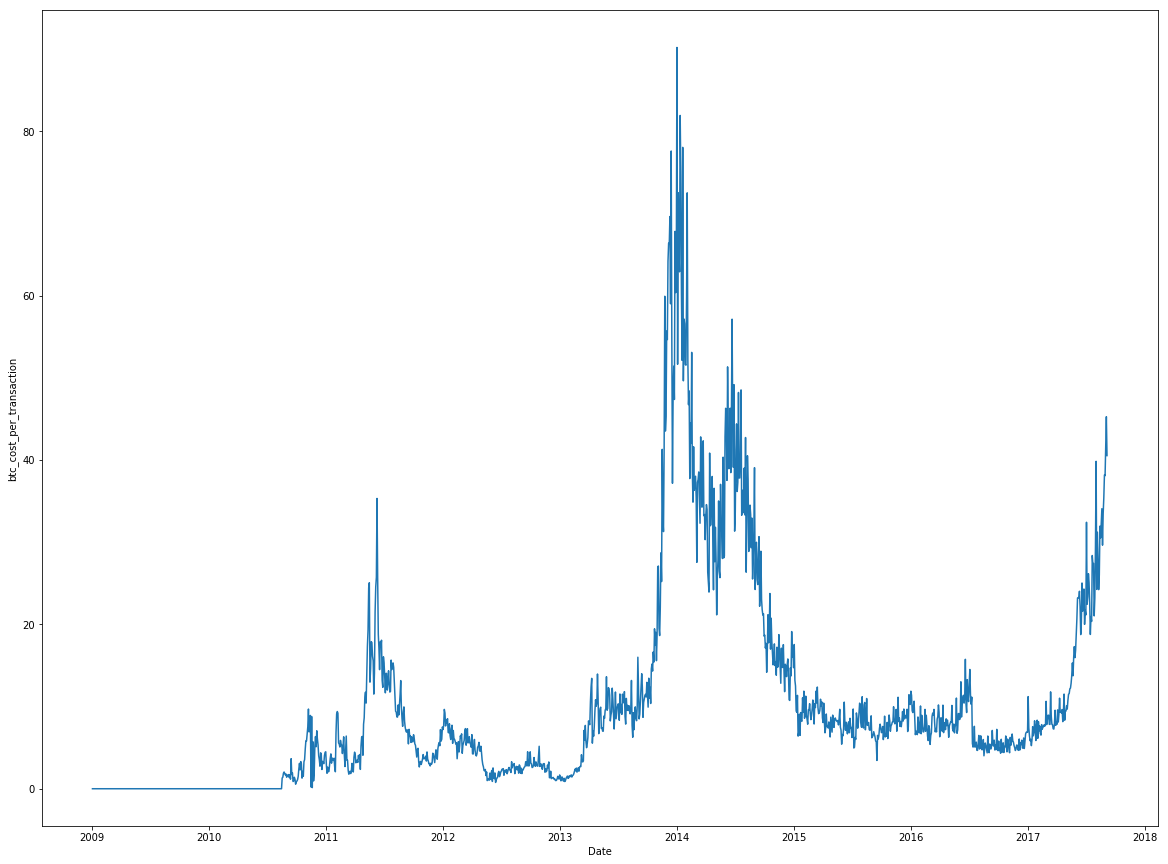

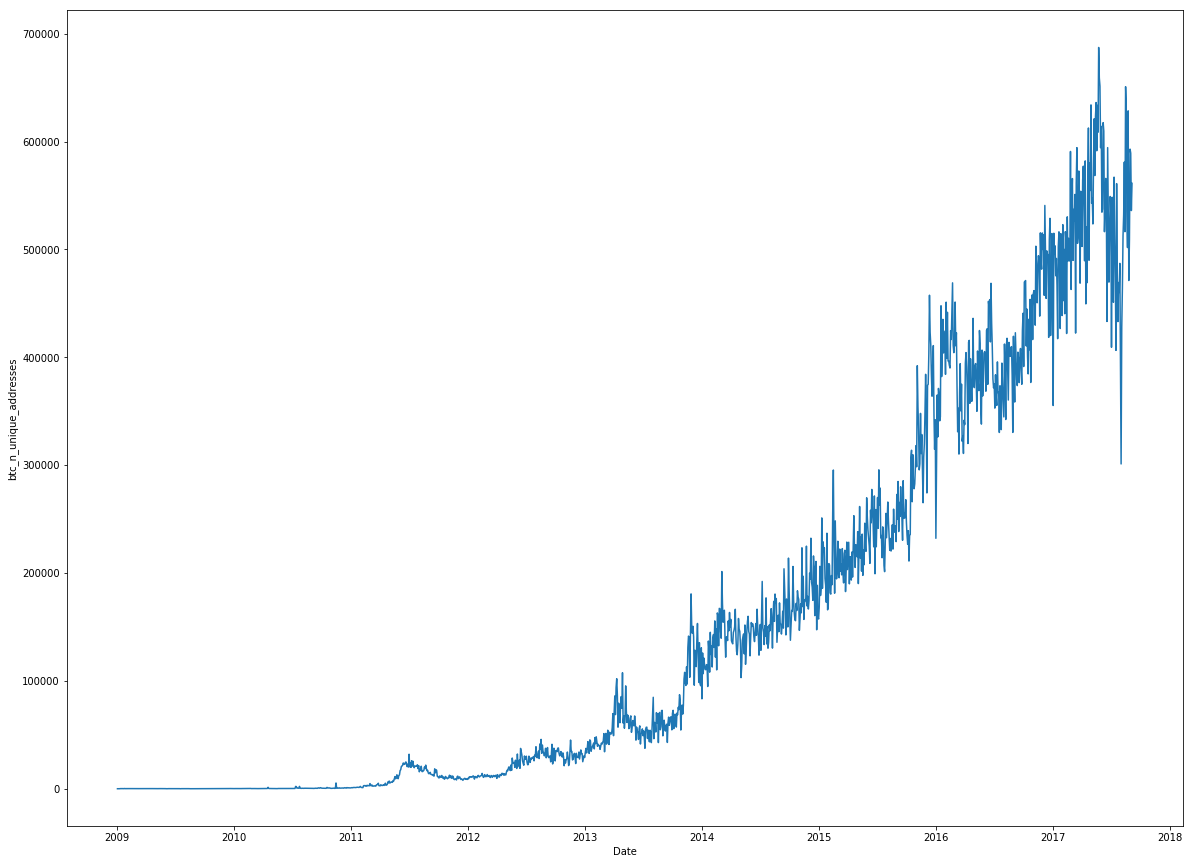

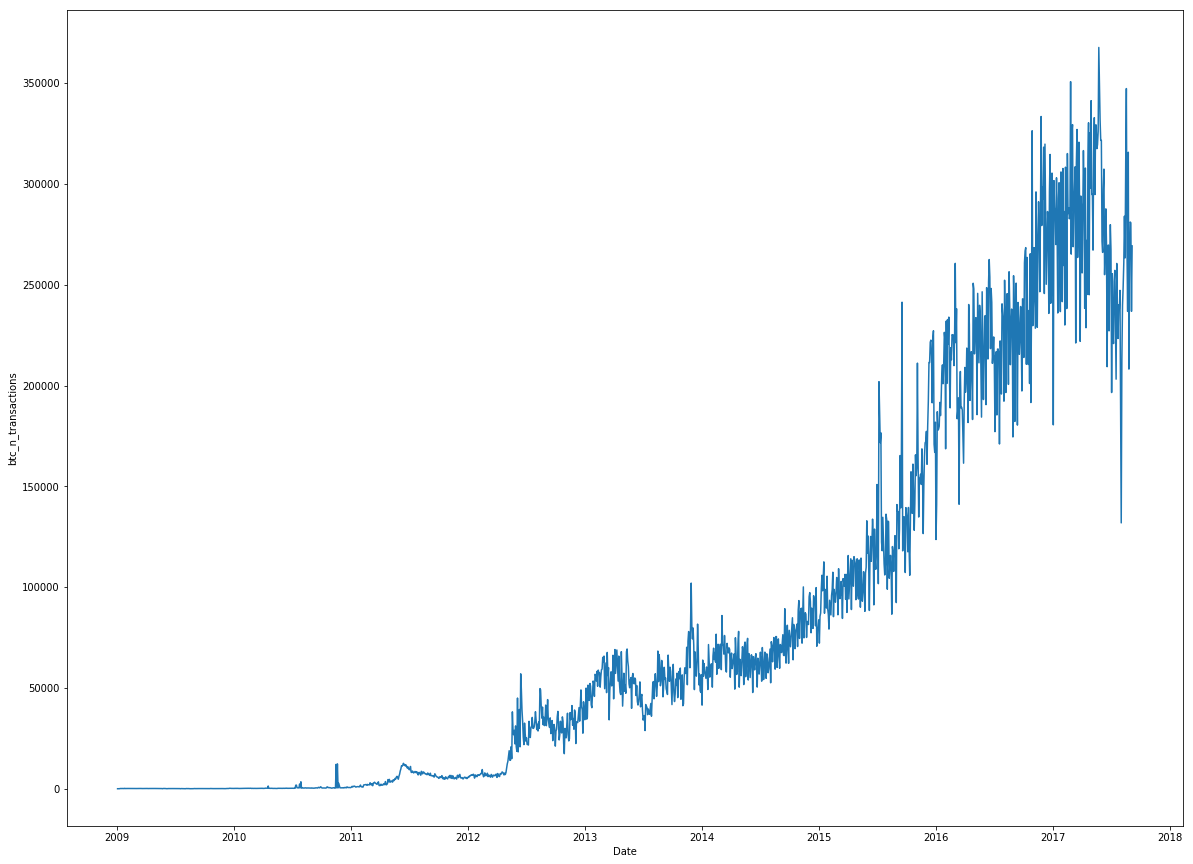

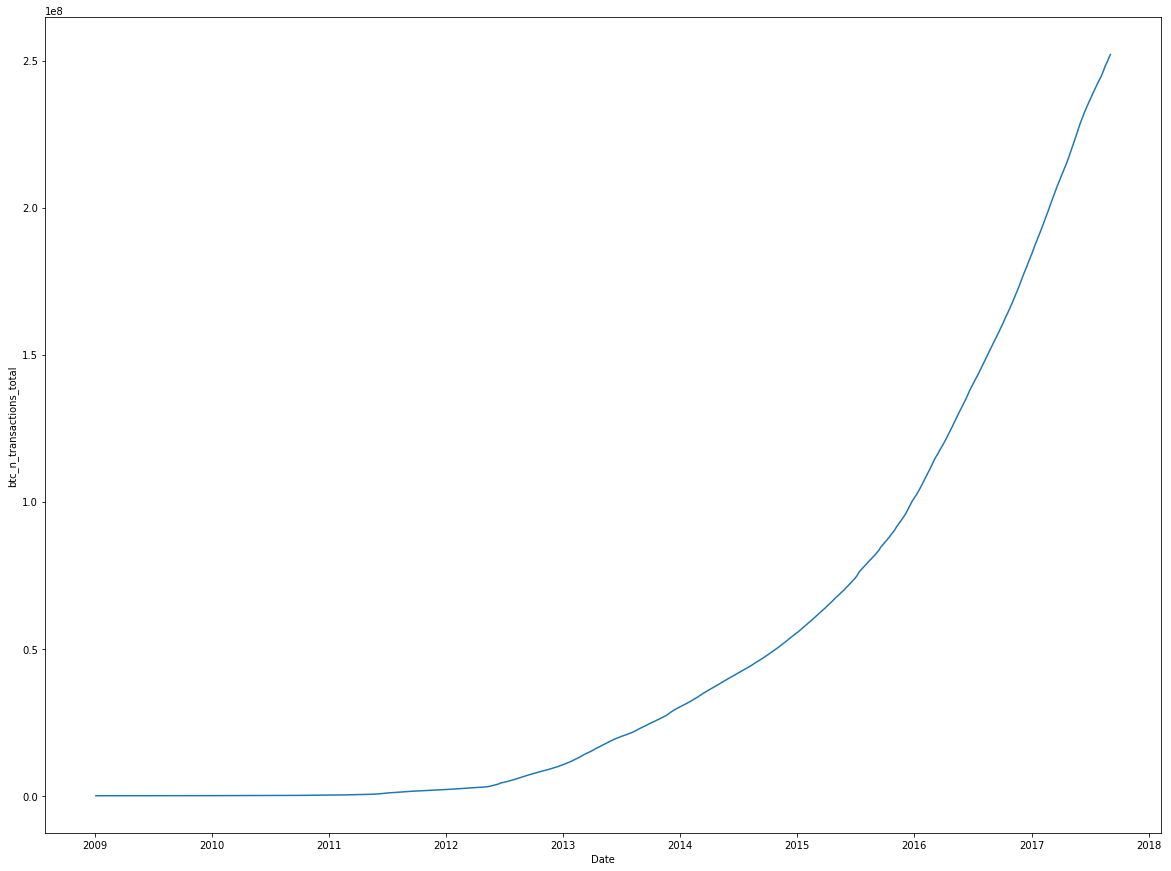

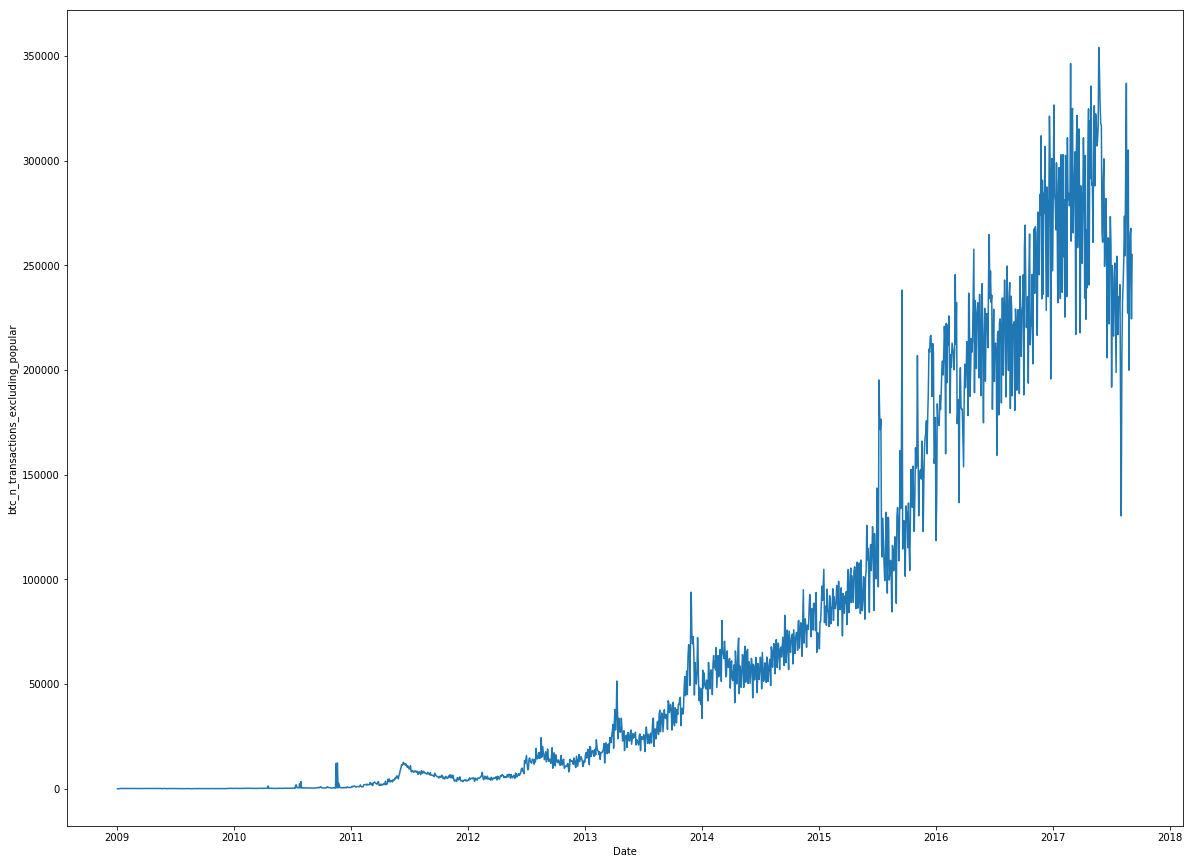

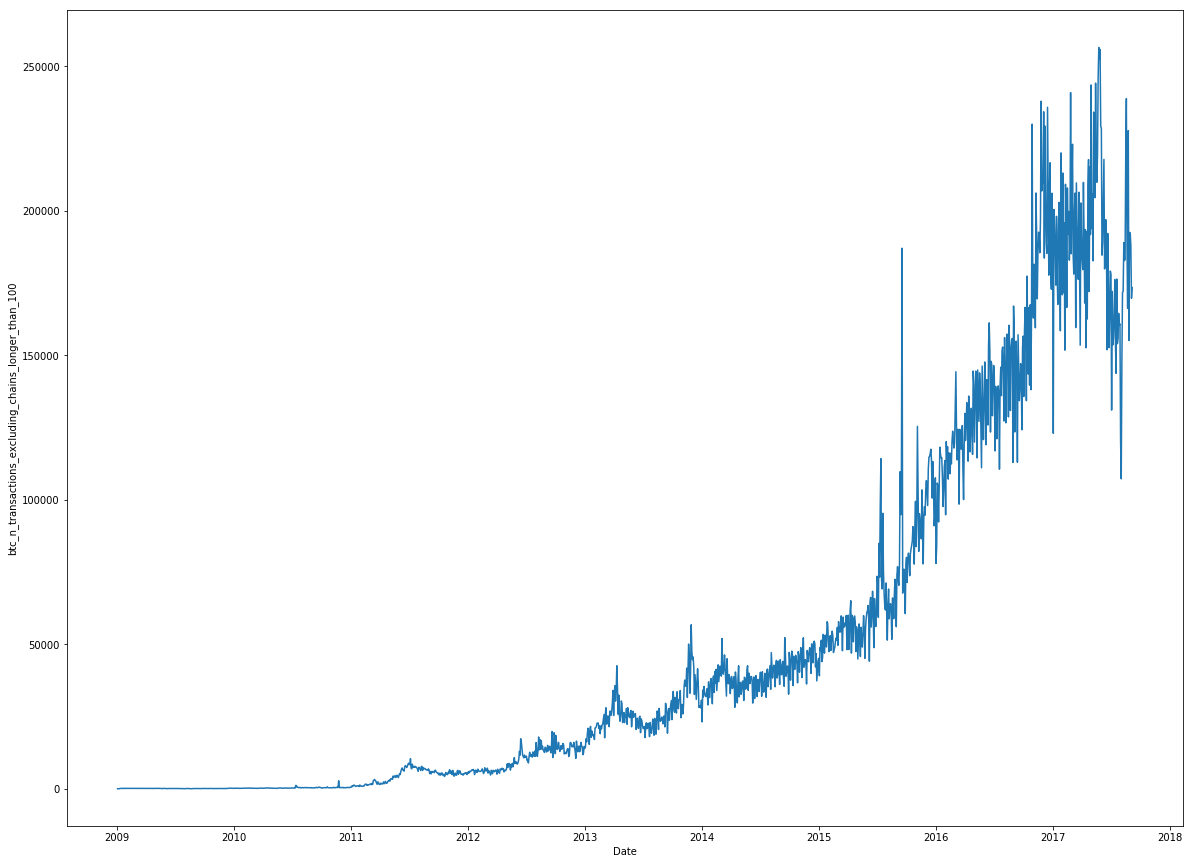

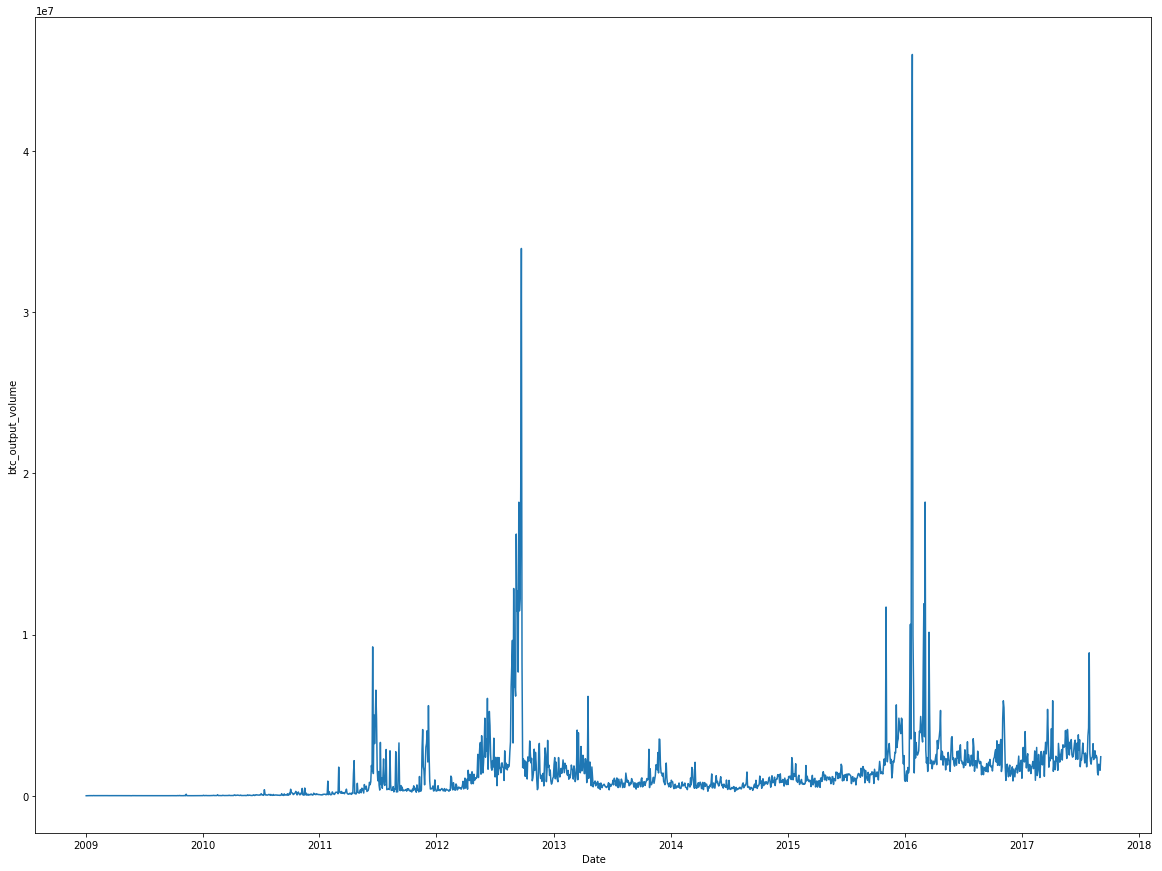

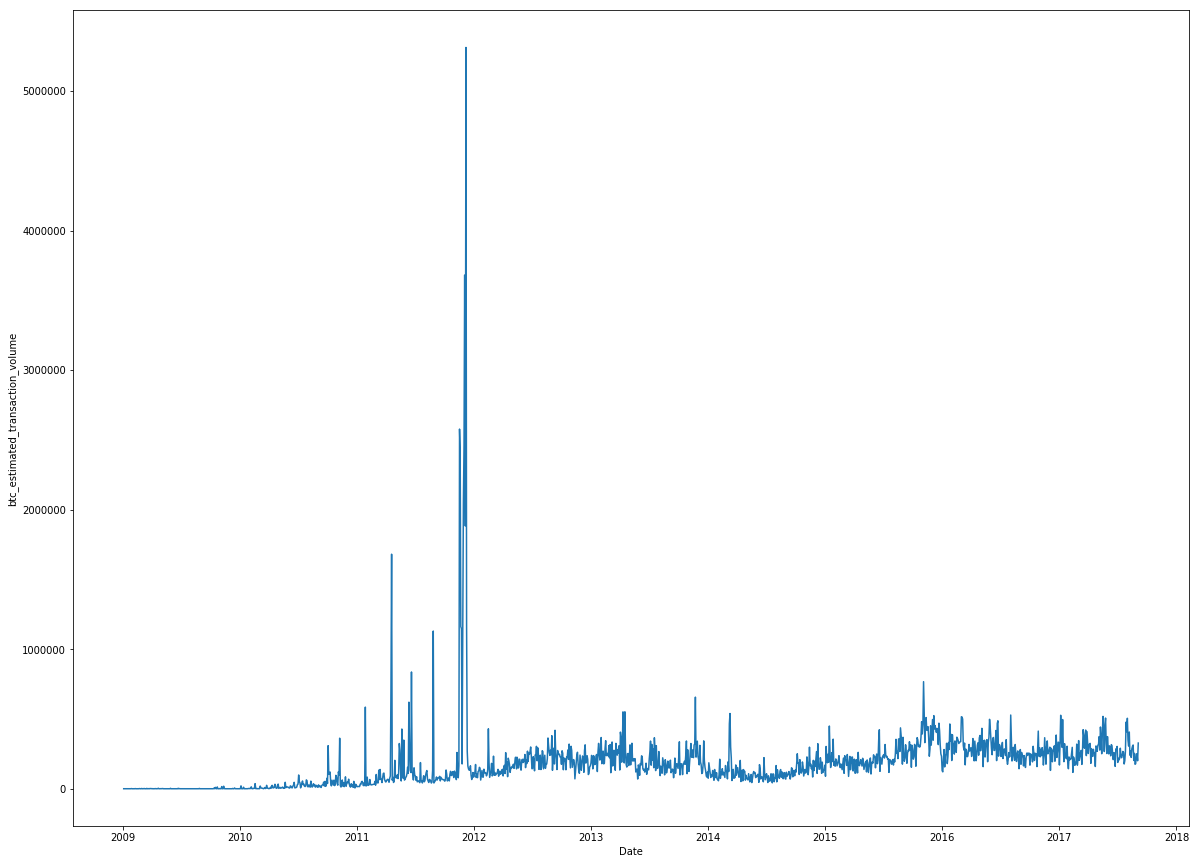

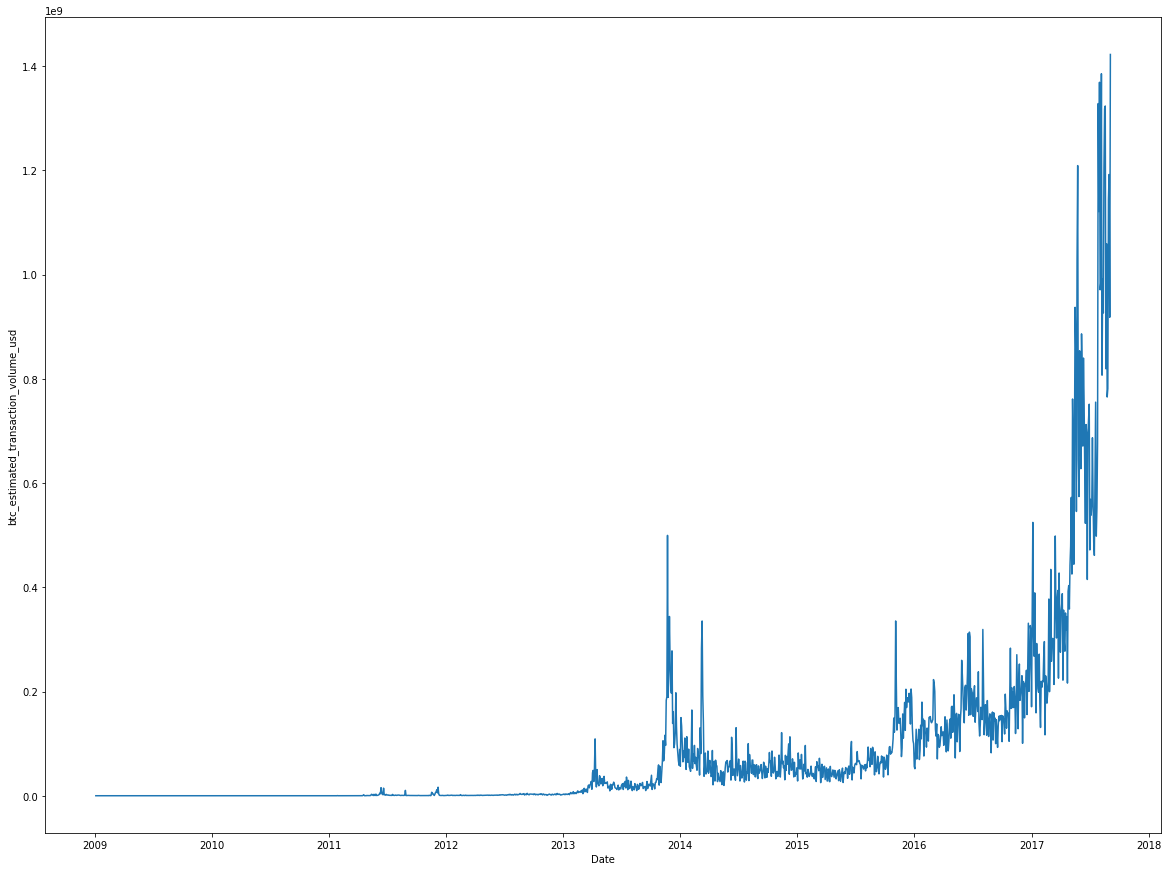

In [45]:
for col in dfbd.columns:
    sns.lineplot(x=dfbd.index, y=col, data=dfbd)
    plt.show();

After watching all these plots, we can see that the cost_per_transaction_percent has a lot of values on early time that are wrong. The solution could be to extrapolate the value or delete the rows, but since we are not really sure about the domain and we want to save the other rows info, we are going to delete the column.

In [46]:
dfbd.drop(columns='btc_cost_per_transaction_percent', inplace=True)

Now let's do the same with the **ethereum** dataset

In [47]:
dfed.index = pd.to_datetime(dfed.index)

dfed.sort_index(ascending=True, inplace=True)

dfed.head()

,UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_chaindatasize,eth_ens_register
Date(UTC),,,,,,,,,,,,,,,,,,
2015-07-30,1438214400,0.0,8893,9205,7.204931e+07,0.0,23.7569,0.121,6912,1299,644,4.46,0,0,0,39316.09375,NaN,NaN
2015-07-31,1438300800,0.0,0,9361,7.208550e+07,0.0,48.1584,0.603,6863,511,582,12.58,0,0,0,36191.71875,NaN,NaN
2015-08-01,1438387200,0.0,0,9476,7.211320e+07,0.0,55.2709,0.887,5293,334,575,16.34,0,0,0,27705.93750,NaN,NaN
2015-08-02,1438473600,0.0,0,9563,7.214143e+07,0.0,64.1779,1.020,5358,394,581,16.12,0,0,0,28223.43750,NaN,NaN
2015-08-03,1438560000,0.0,0,9639,7.216940e+07,0.0,69.8559,1.126,5280,443,587,16.37,0,0,0,27976.71875,NaN,NaN


In [48]:
dfed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 769 entries, 2015-07-30 to 2017-09-05
Data columns (total 18 columns):
UnixTimeStamp        769 non-null int64
eth_etherprice       769 non-null float64
eth_tx               769 non-null int64
eth_address          769 non-null int64
eth_supply           769 non-null float64
eth_marketcap        769 non-null float64
eth_hashrate         769 non-null float64
eth_difficulty       769 non-null float64
eth_blocks           769 non-null int64
eth_uncles           769 non-null int64
eth_blocksize        769 non-null int64
eth_blocktime        769 non-null float64
eth_gasprice         769 non-null int64
eth_gaslimit         769 non-null int64
eth_gasused          769 non-null int64
eth_ethersupply      769 non-null float64
eth_chaindatasize    0 non-null float64
eth_ens_register     125 non-null float64
dtypes: float64(9), int64(9)
memory usage: 114.1 KB


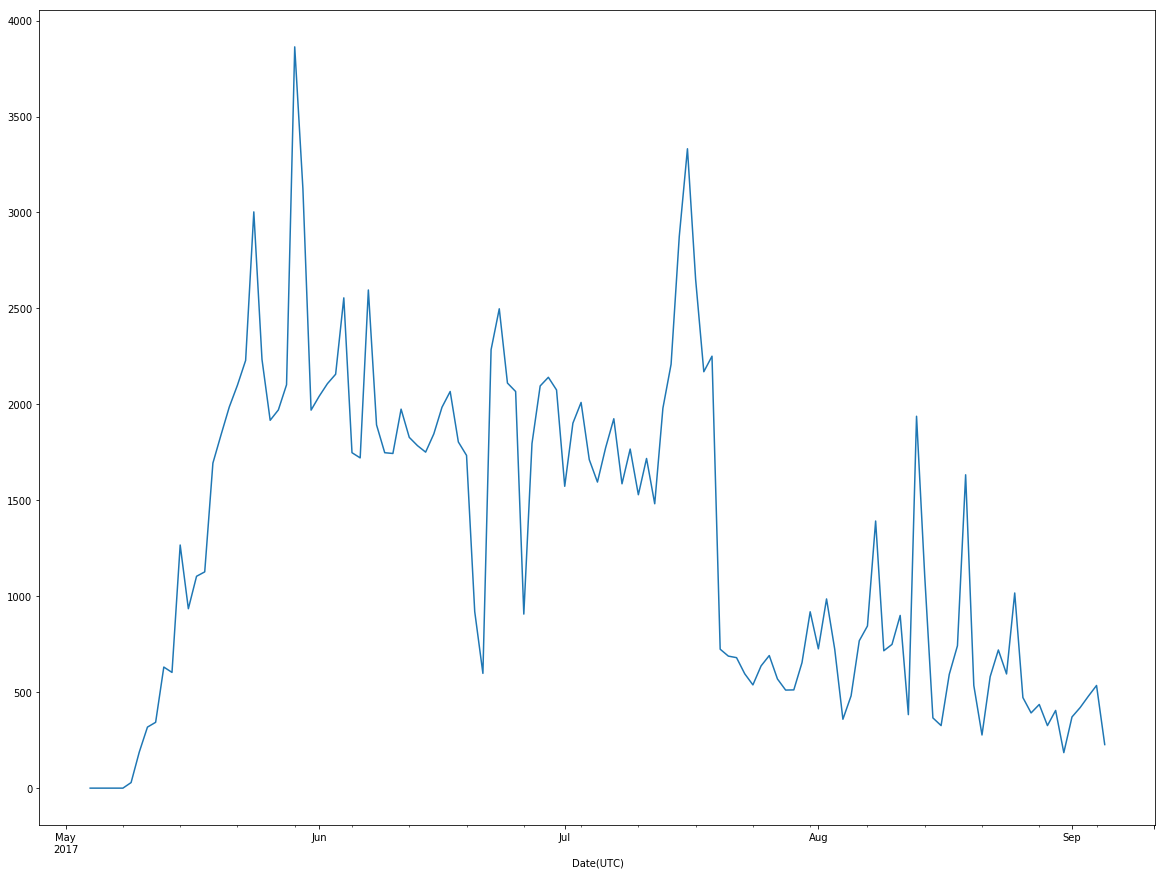

In [49]:
dfed.eth_ens_register.plot()

We only have data from May 2017 until Sept 2017, therefore, we are going to fill the nan values with a -1, indicating that we do not know the real value

In [50]:
dfed.eth_ens_register.fillna(-1, inplace=True)

In [51]:
dfed.eth_chaindatasize.count()

0

We are going to delete the chain data size column, it's all null

In [52]:
dfed.drop(columns='eth_chaindatasize', inplace=True)

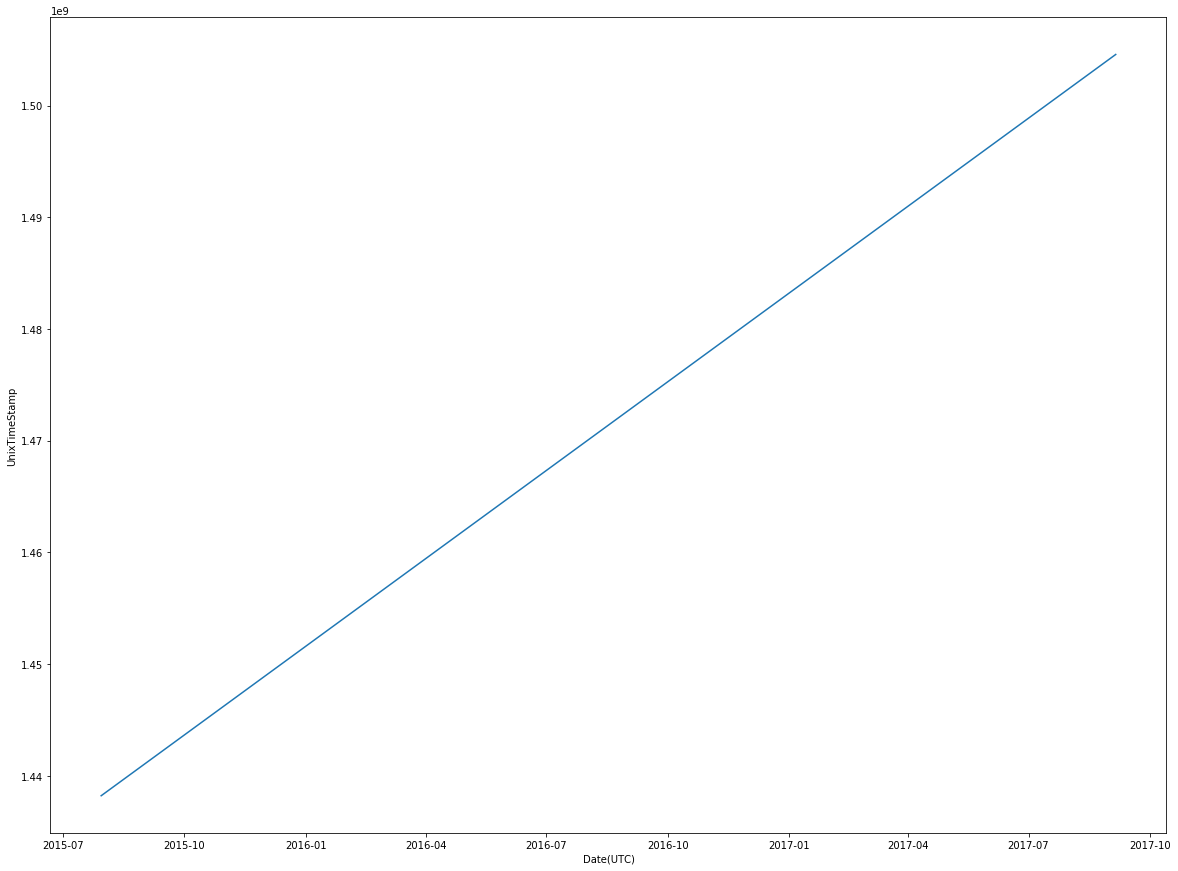

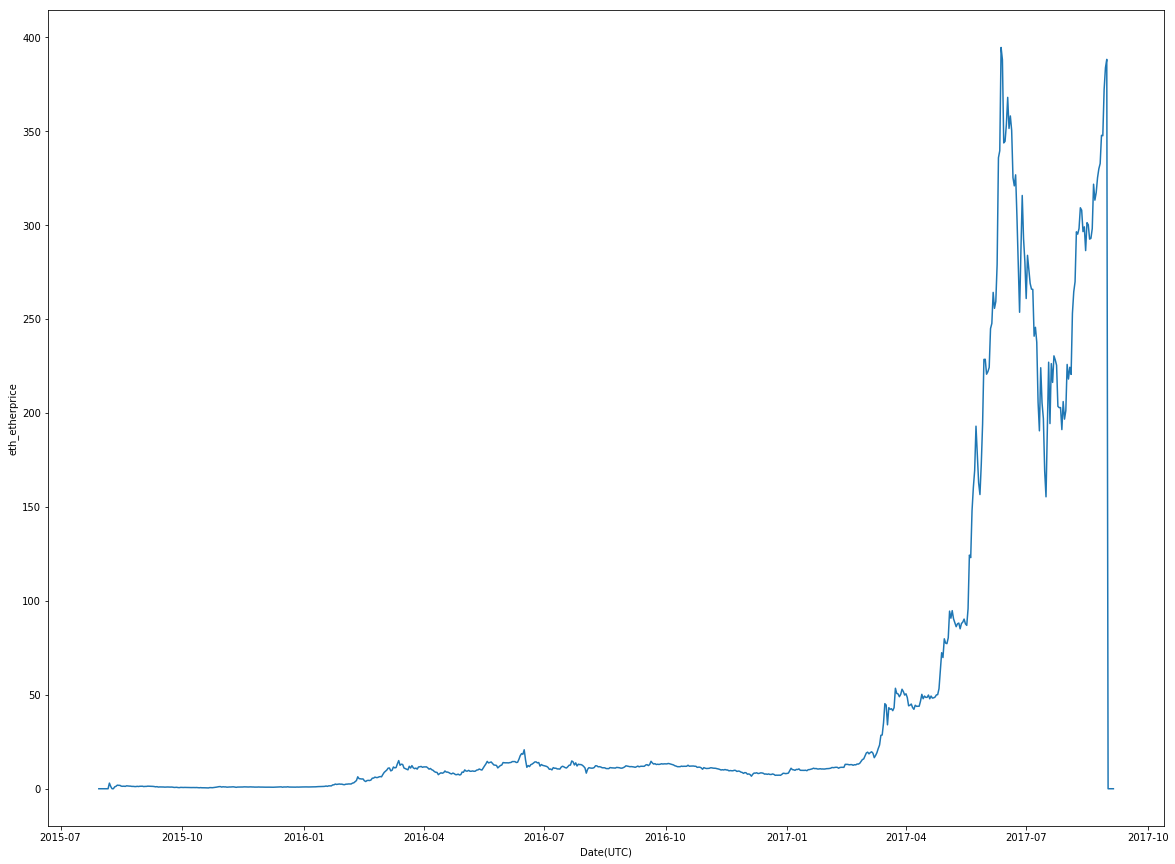

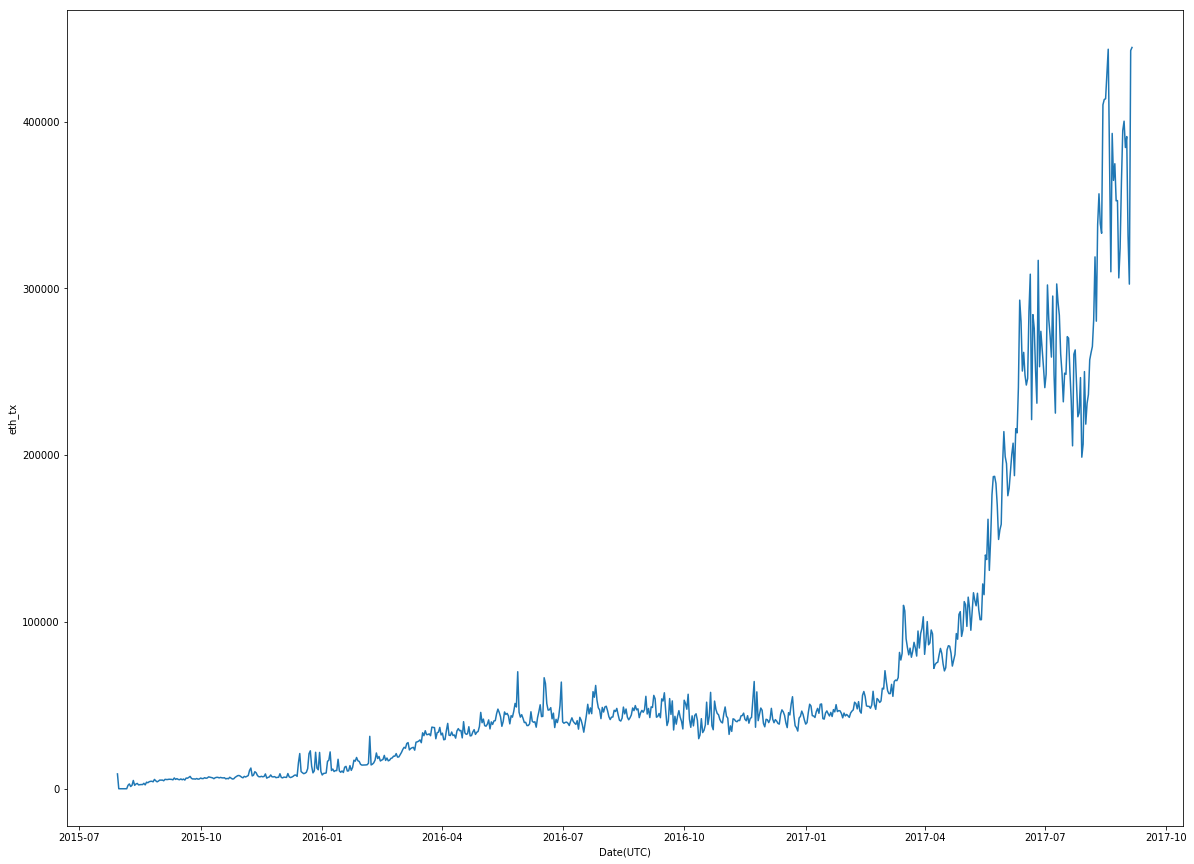

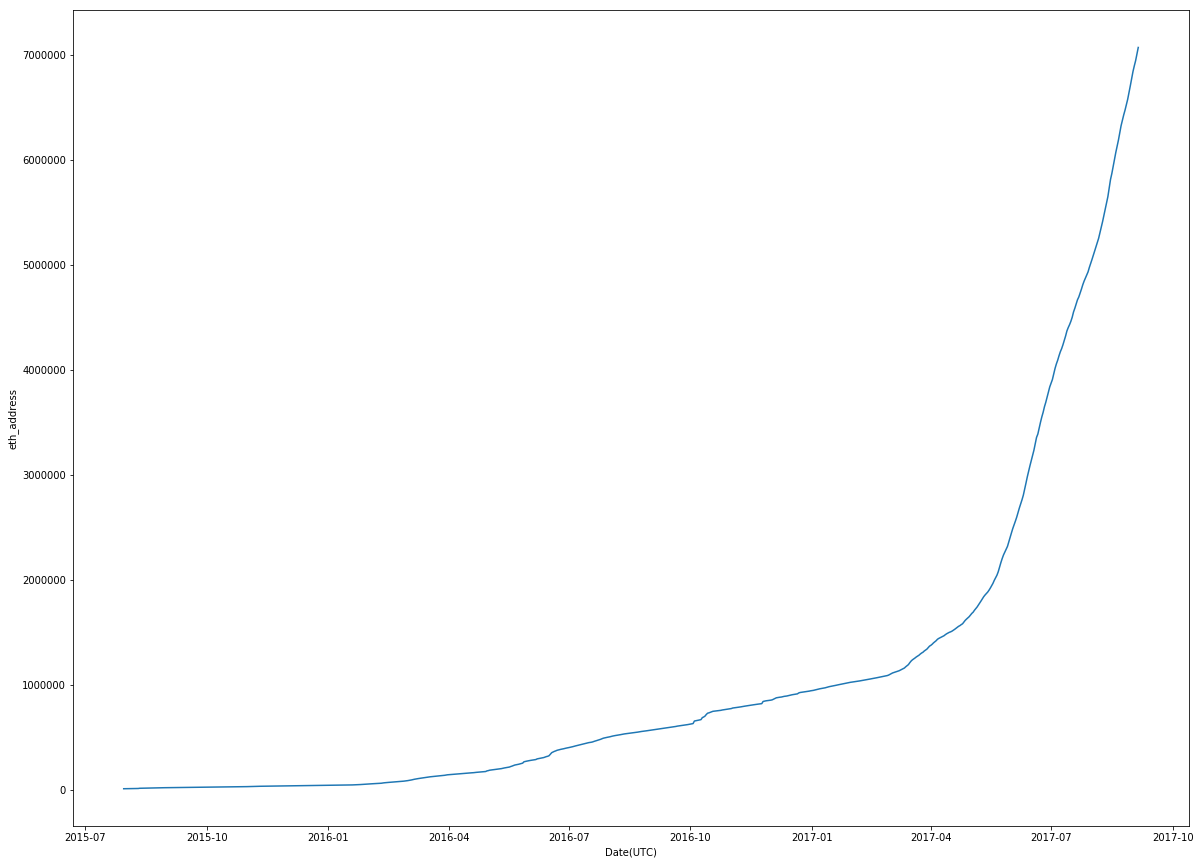

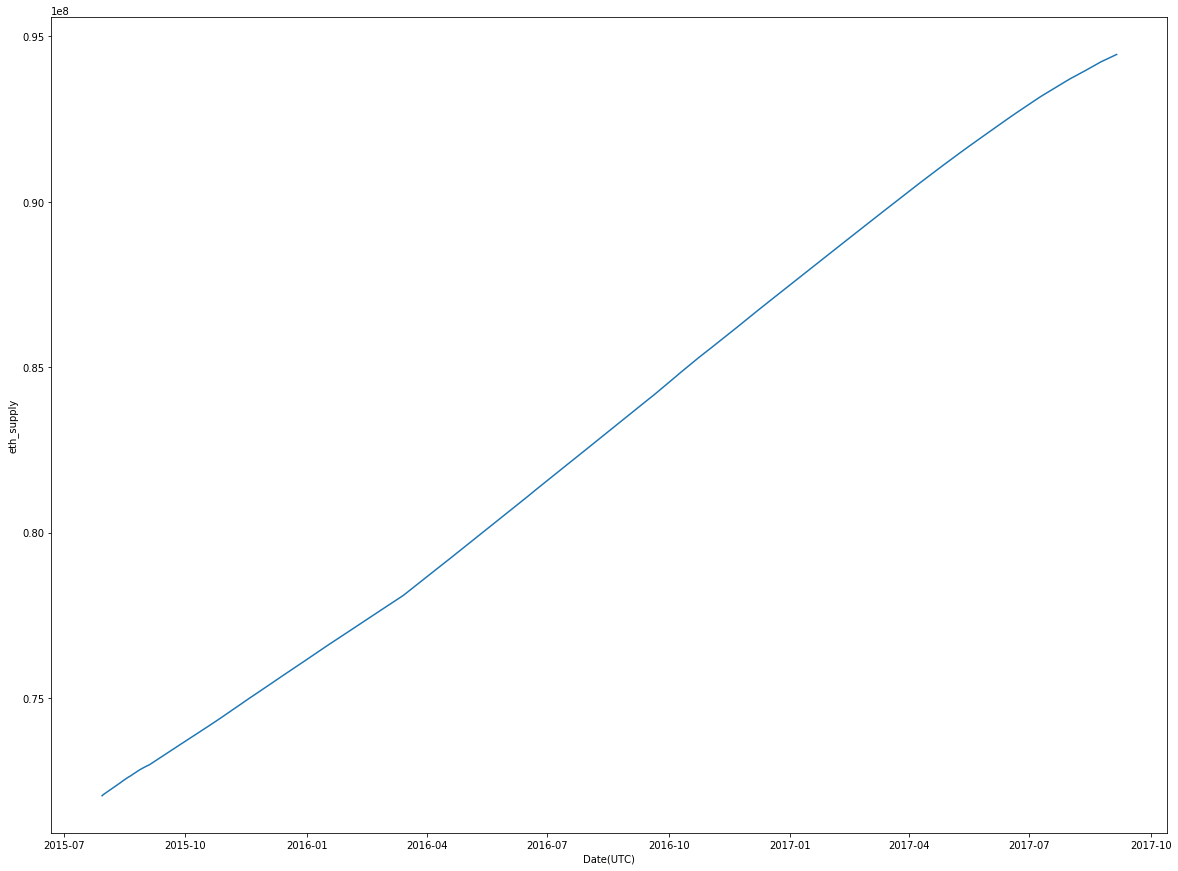

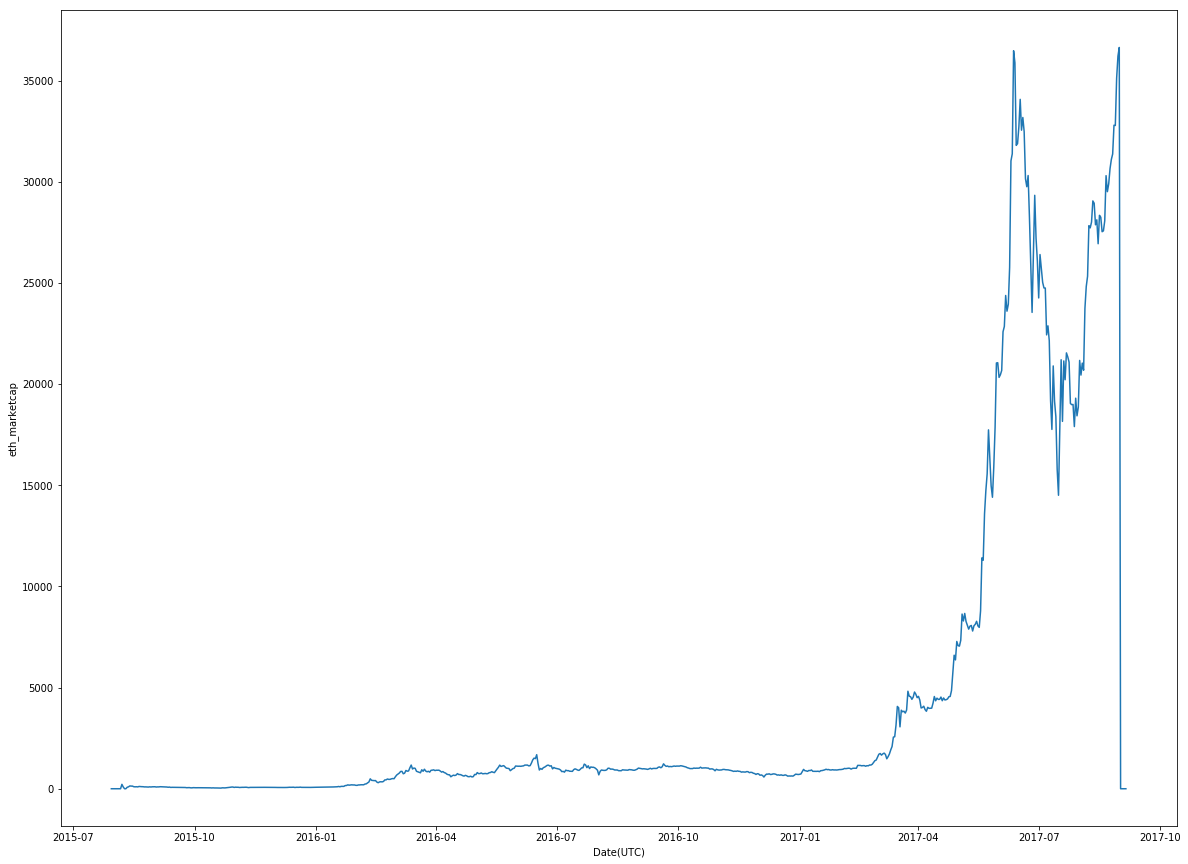

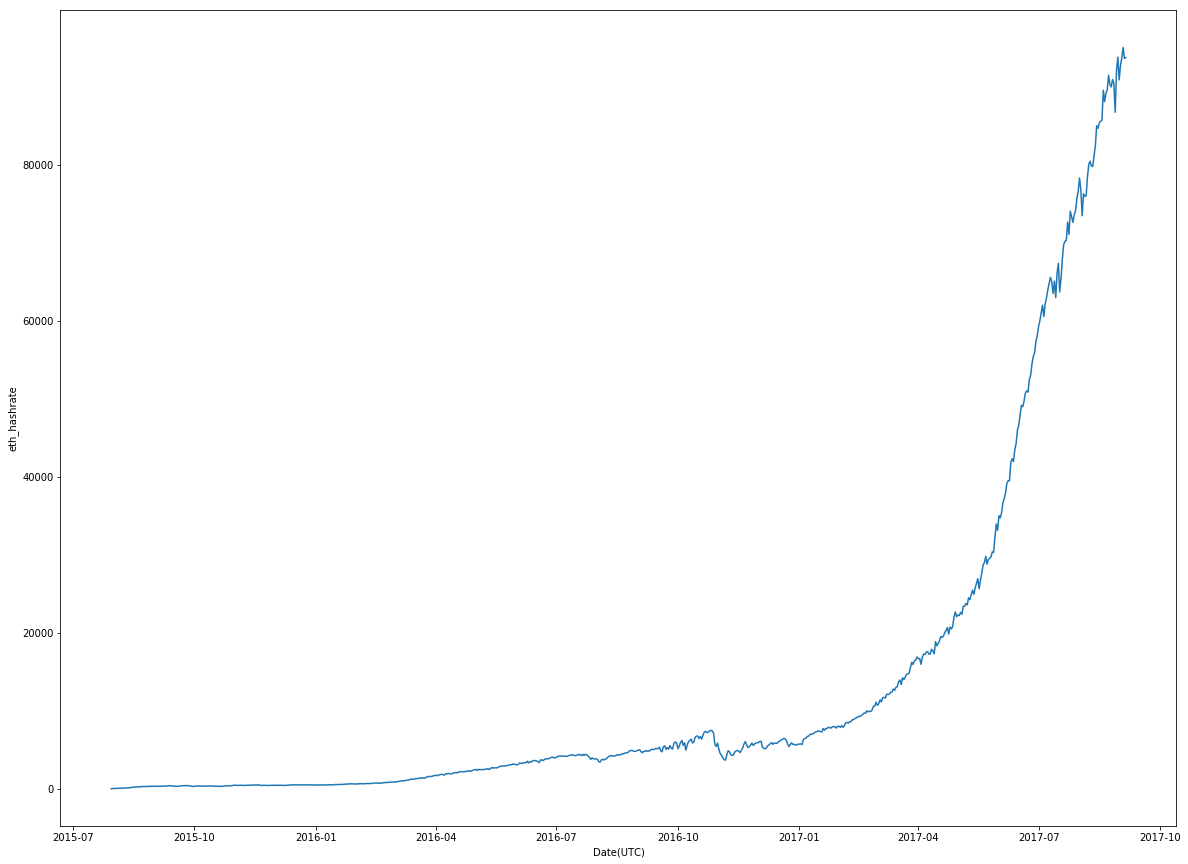

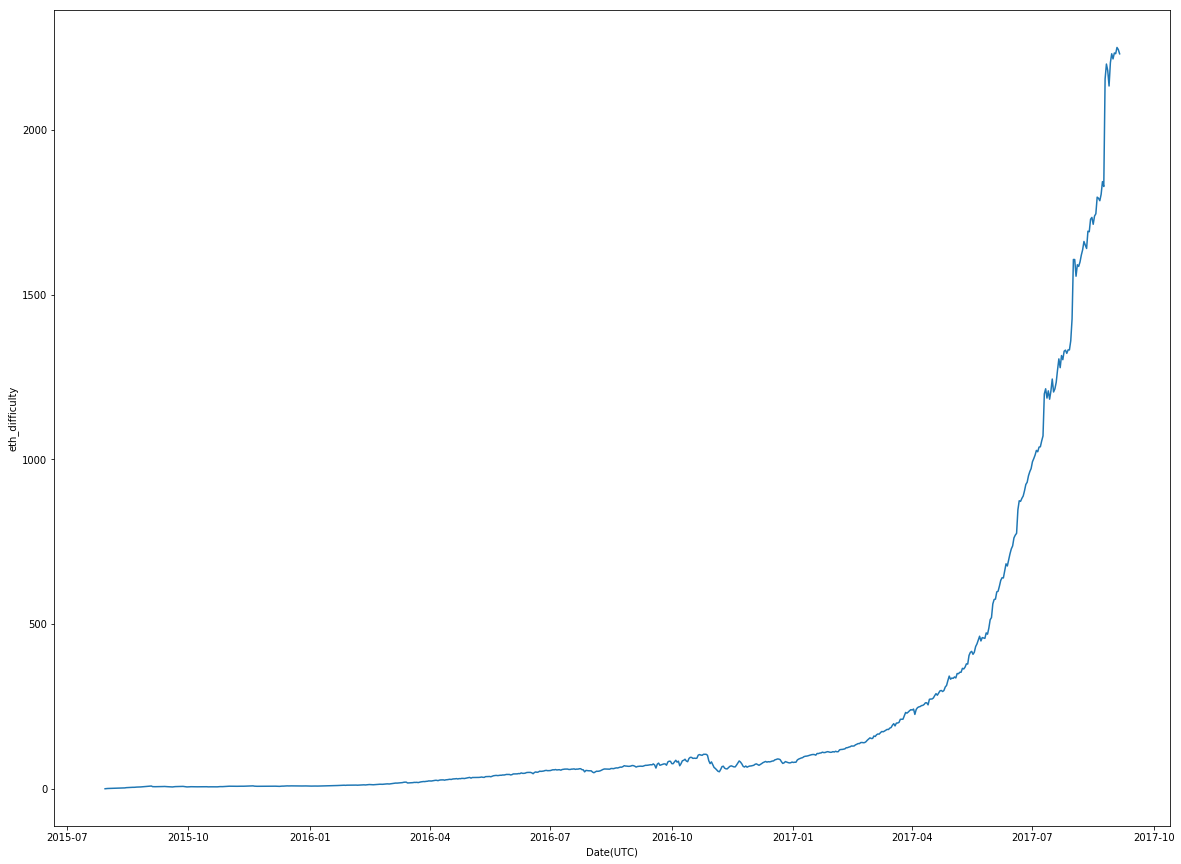

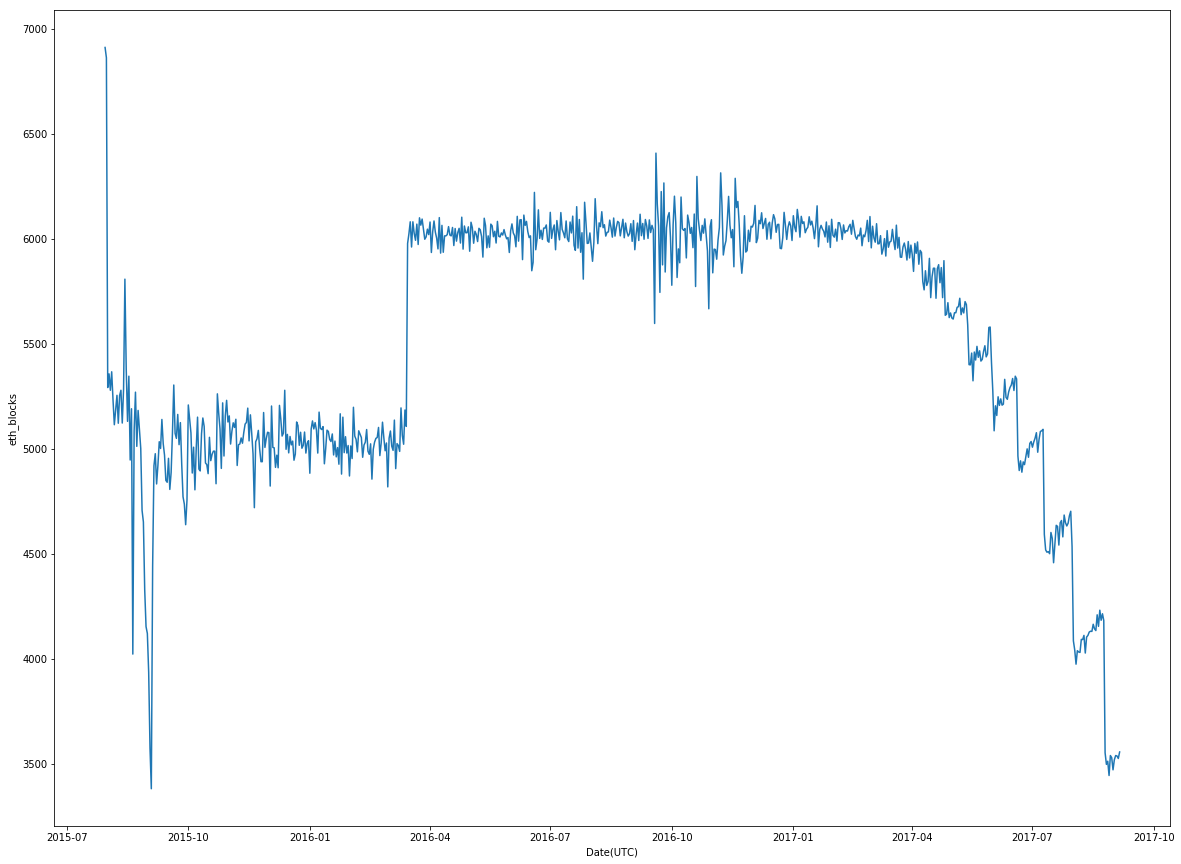

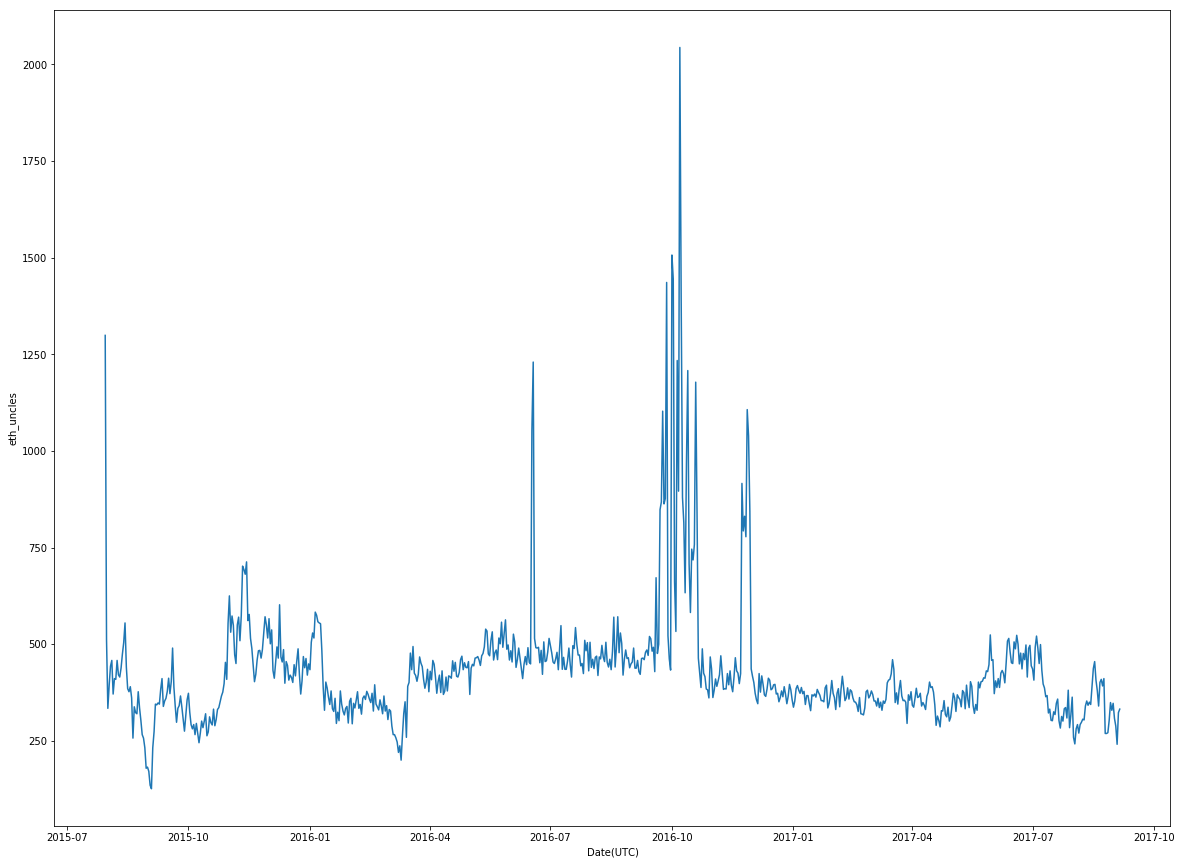

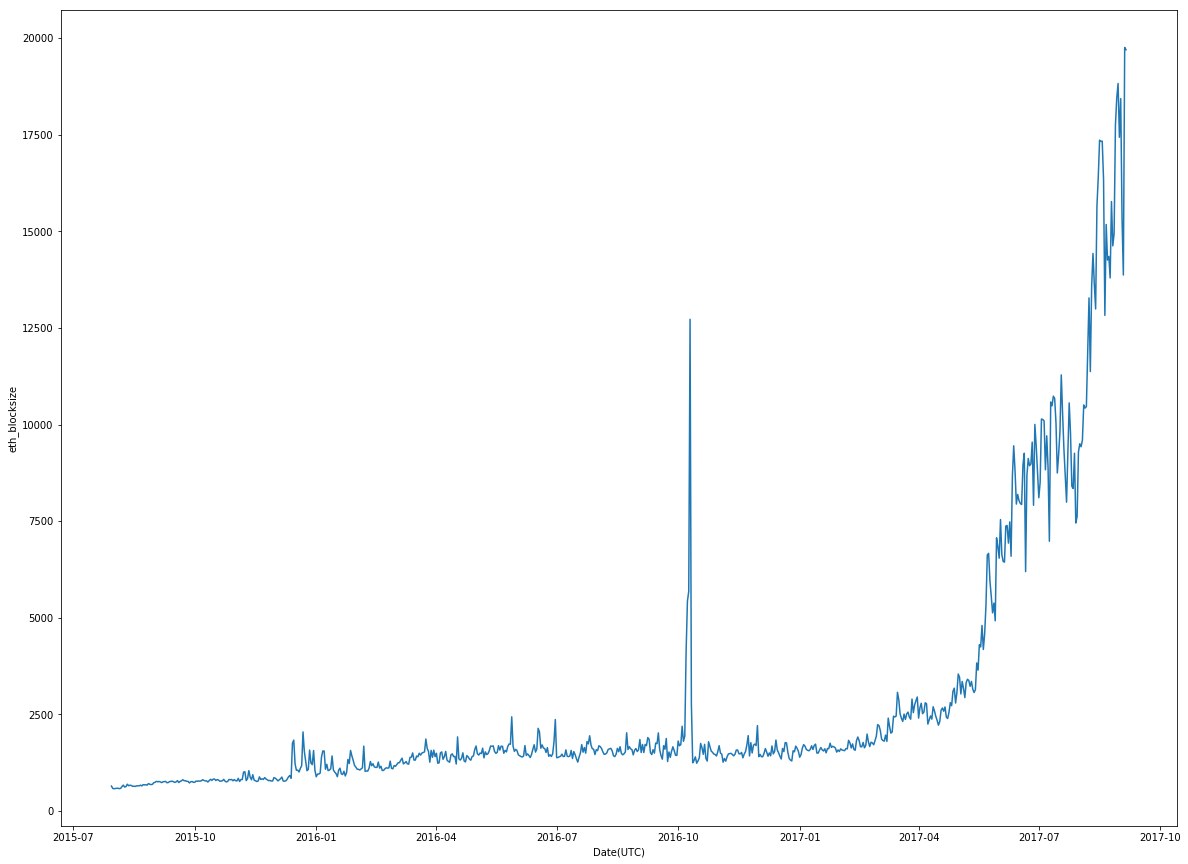

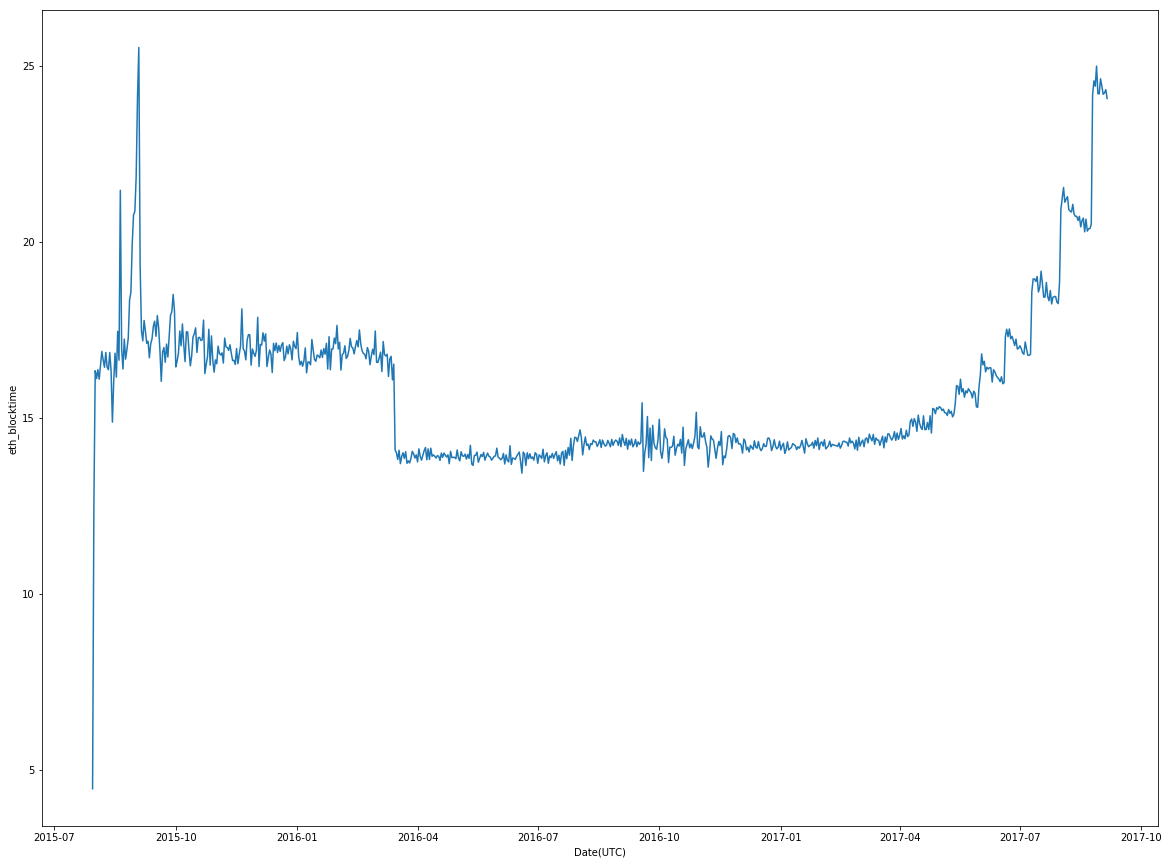

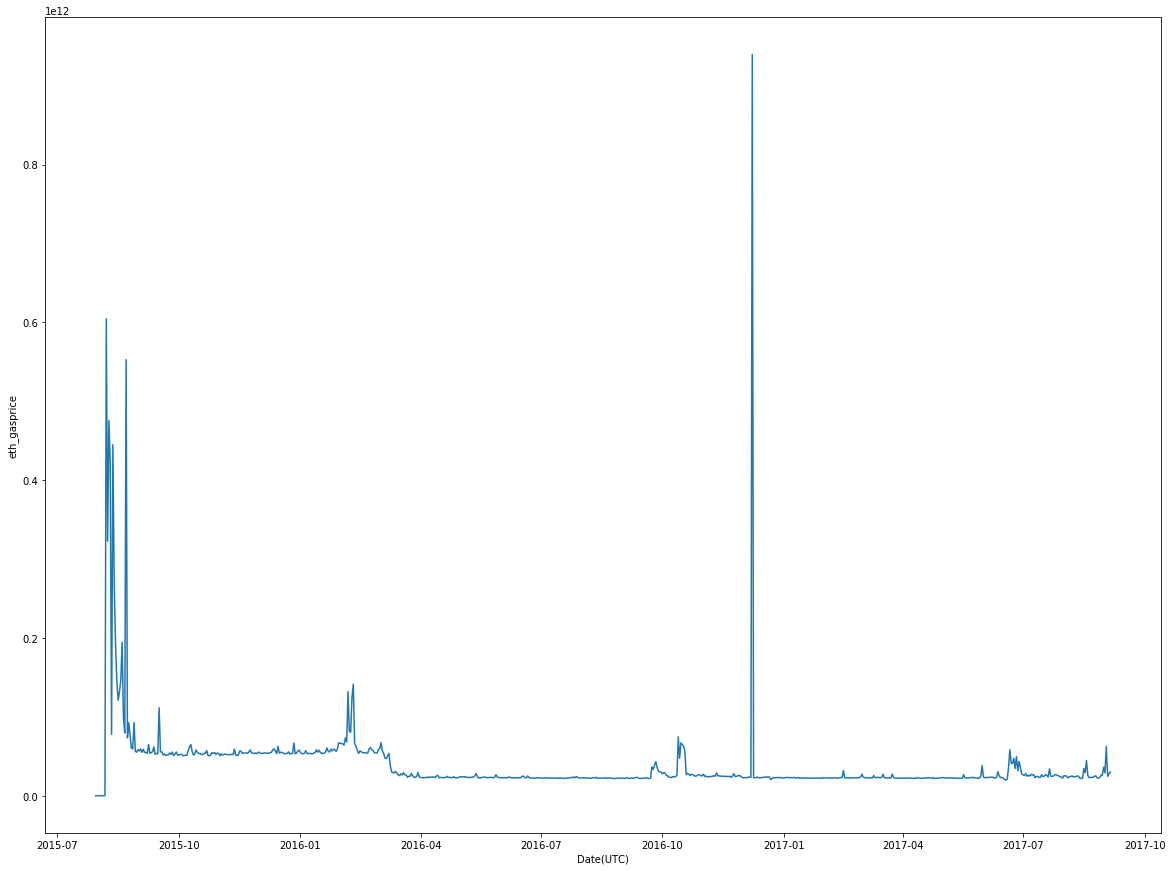

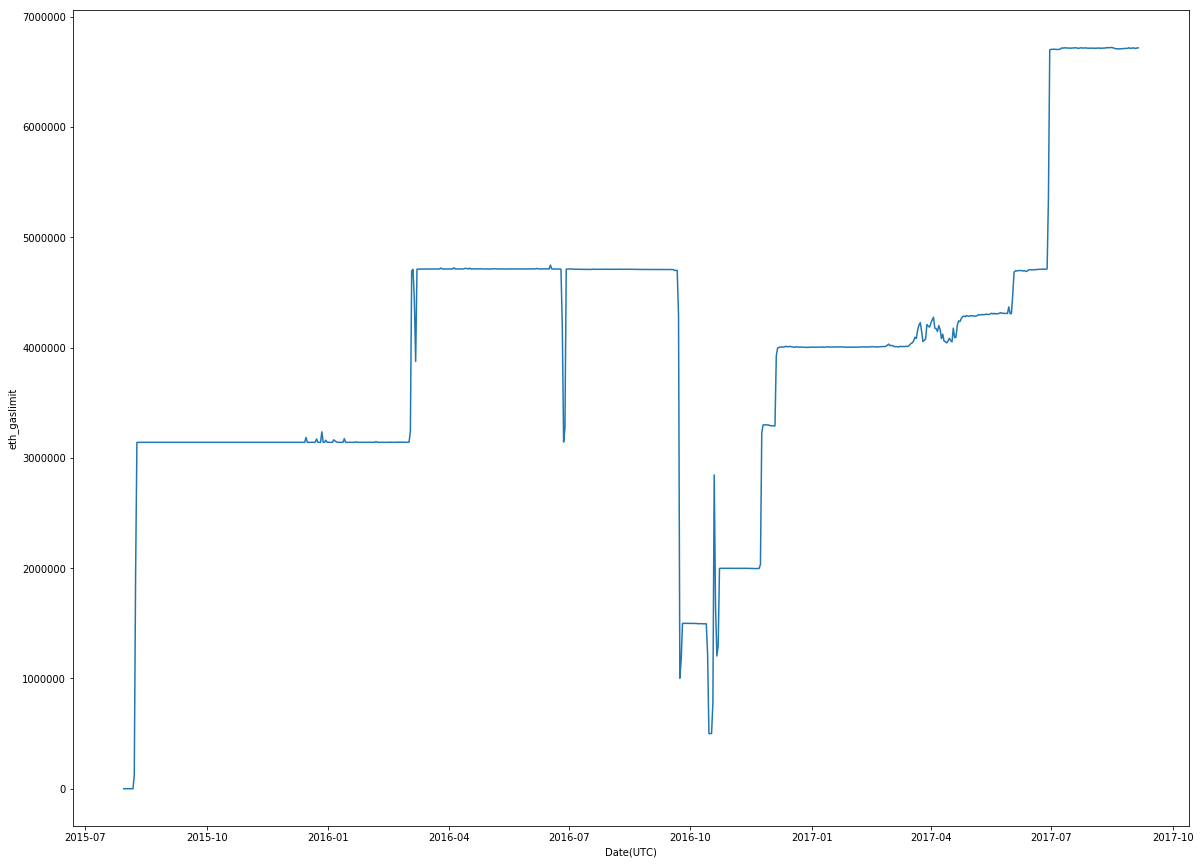

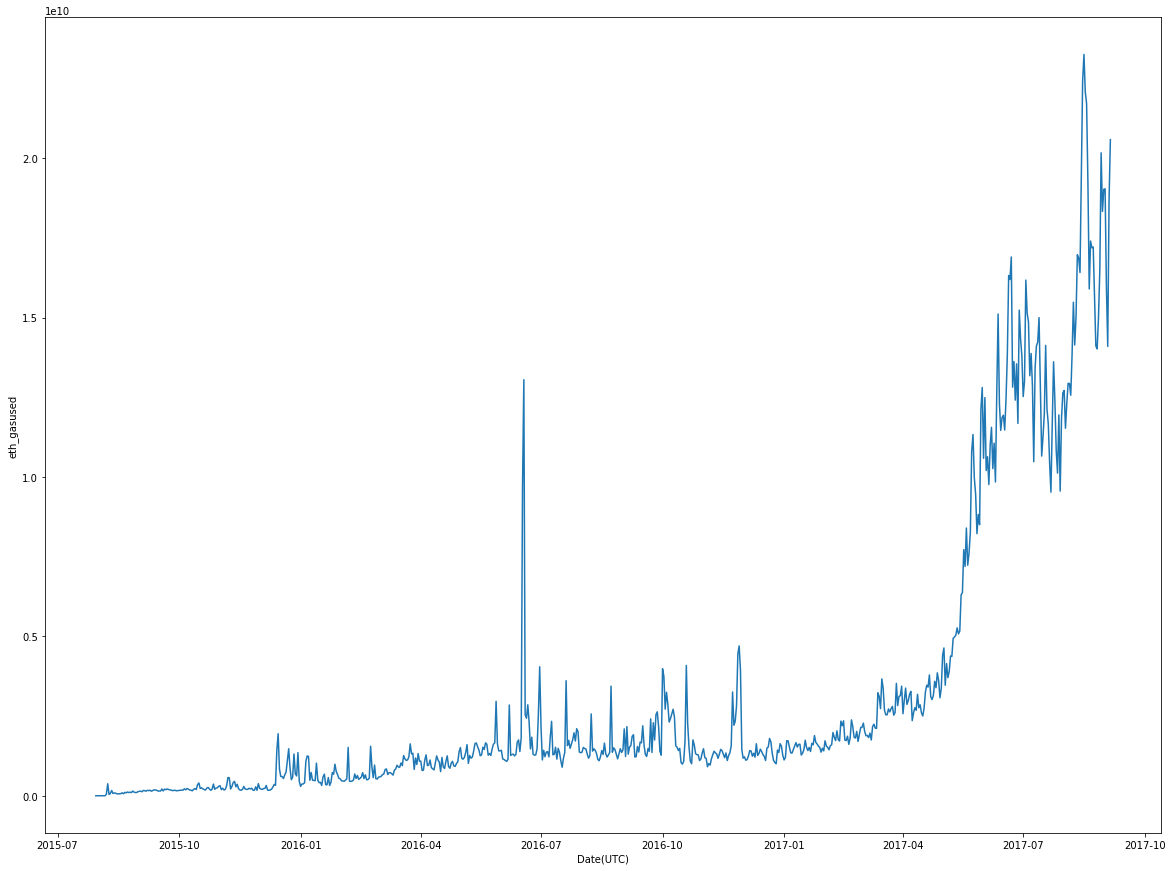

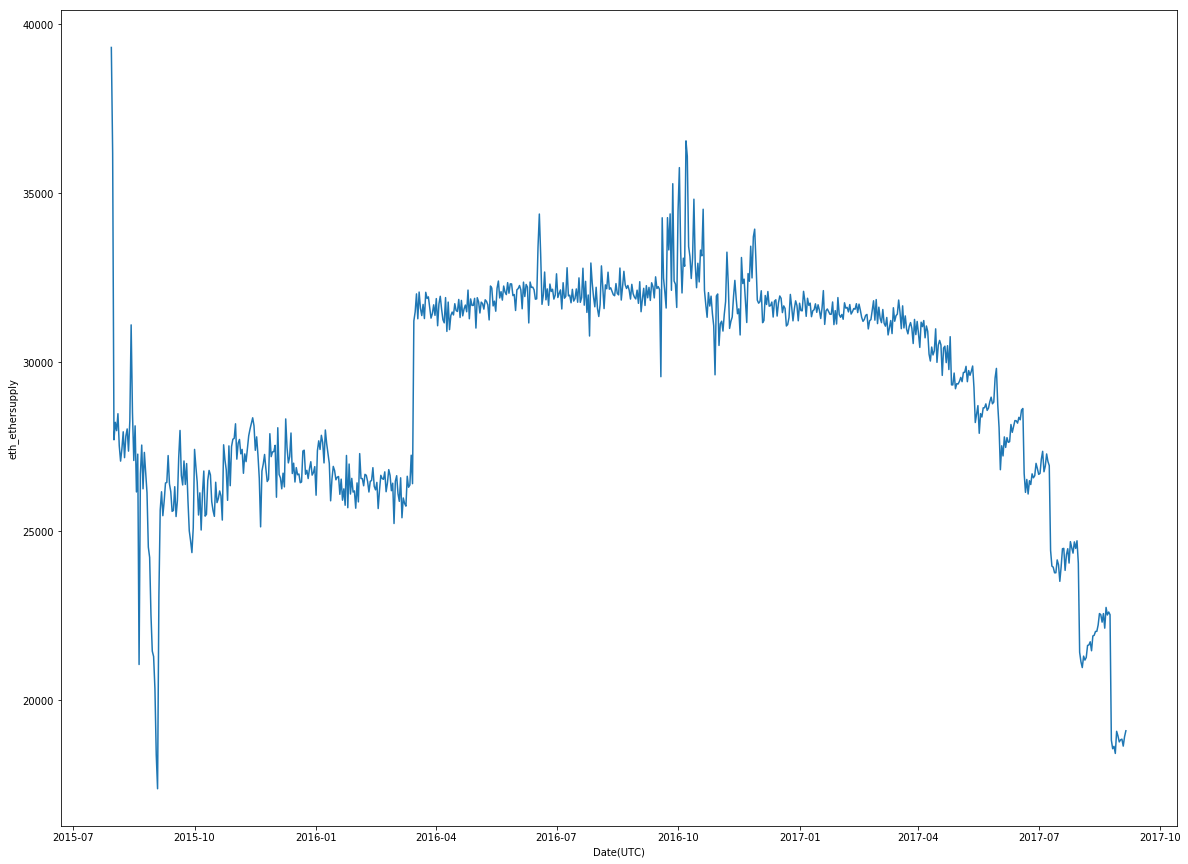

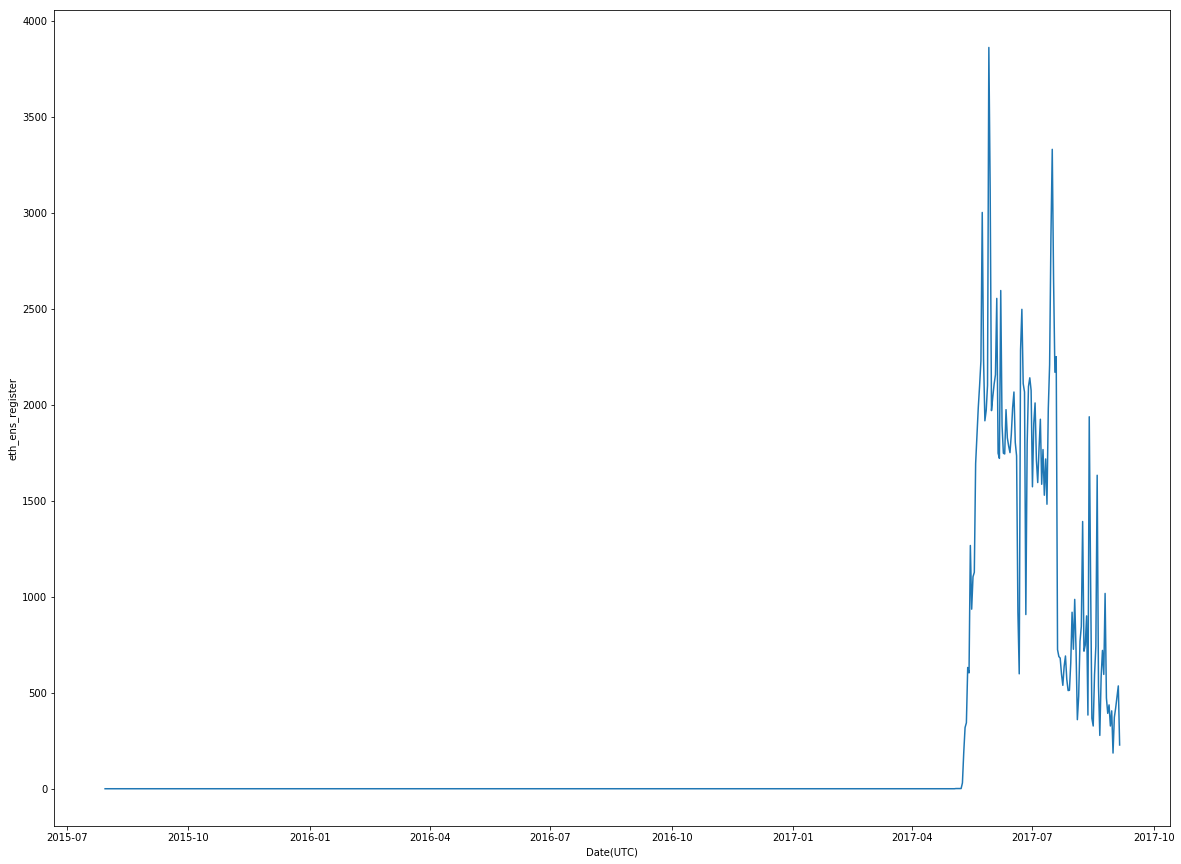

In [53]:
for col in dfed.columns:
    sns.lineplot(x=dfed.index, y=col, data=dfed)
    plt.show();

We can appreciate how the ethereum gas price was really big at the end of 2016, but we are going to suppose that the value near 1 is totally normal. Furthermore, it could have been an anomaly with the blocksize at october 2016, since the bloacksize was a lot higher than the near values. The problem is that in the same time series we have pike values that are near this ones that we consider outliers, so the best thing to do is to mainain them.

Another possibility is to smooth those values:

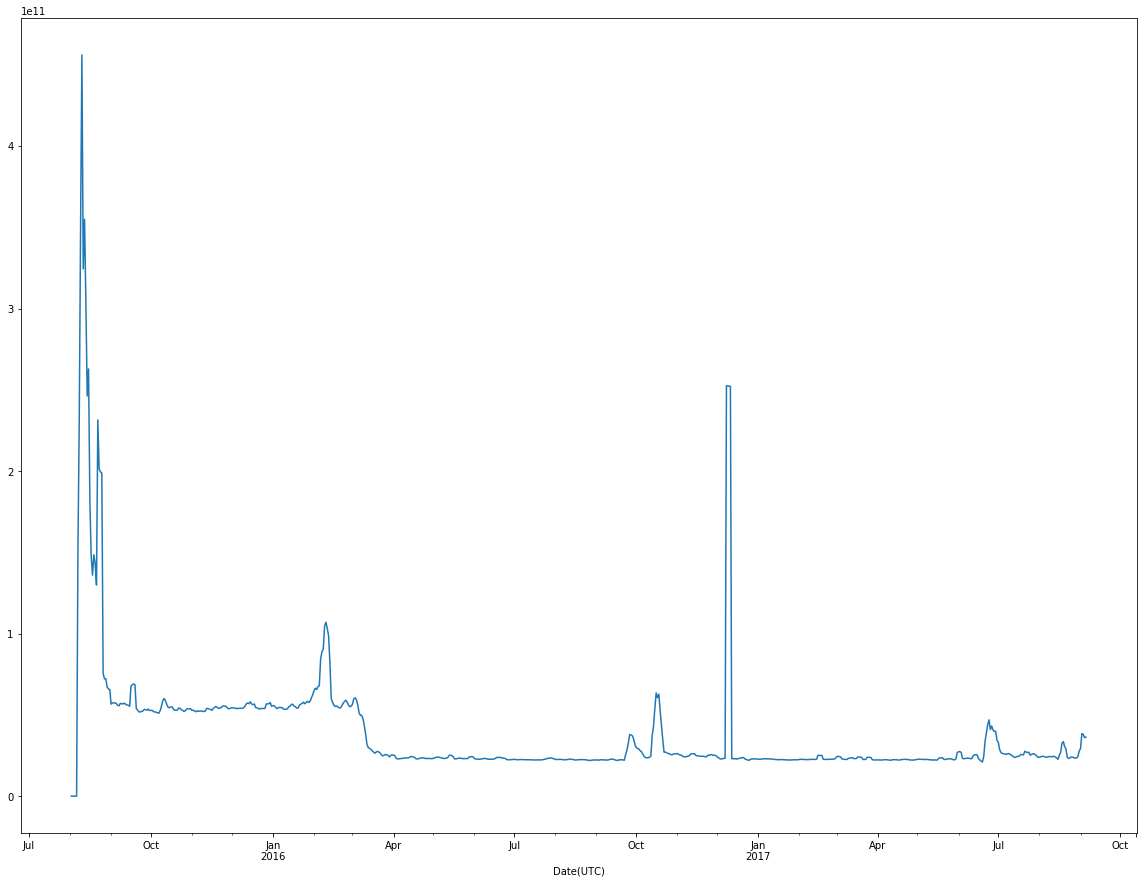

In [54]:
dfed.eth_gasprice.rolling(4).mean().plot()

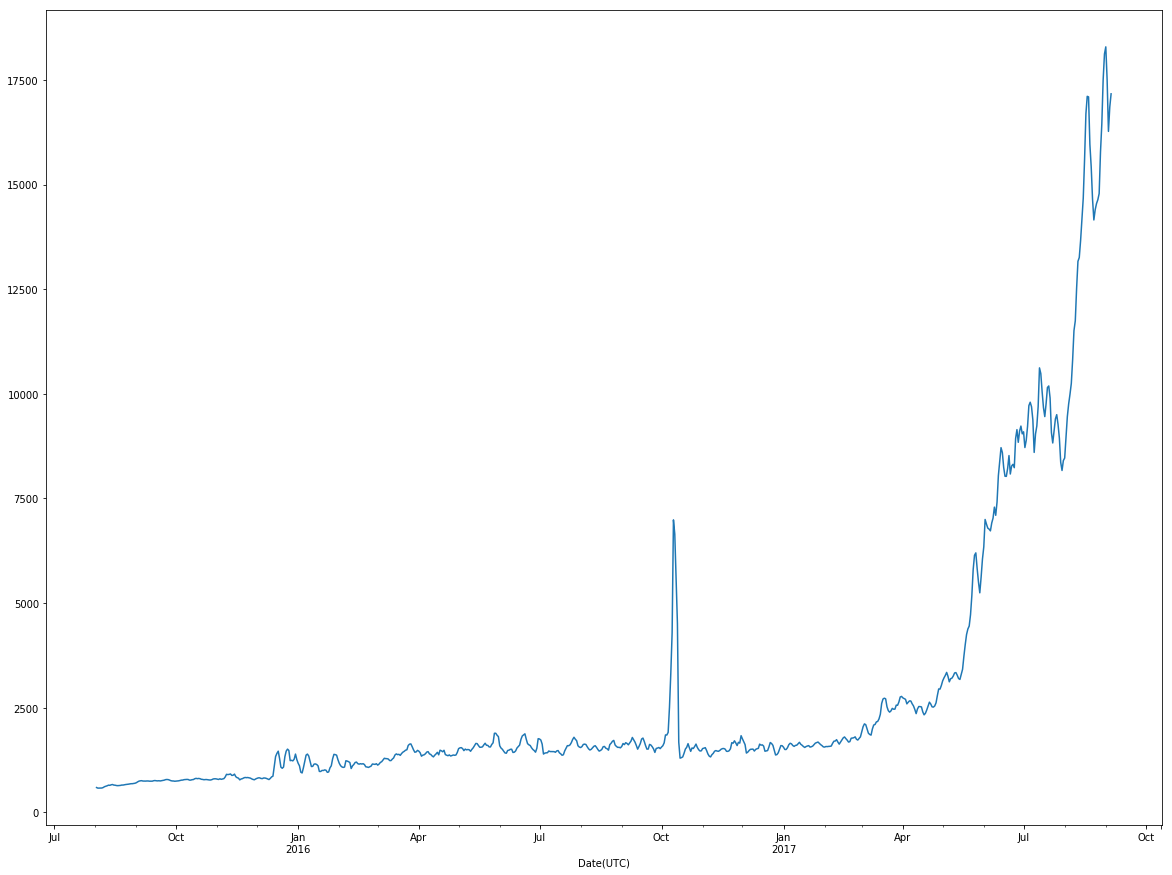

In [55]:
dfed.eth_blocksize.rolling(4).mean().plot()

Finally, lets save the processed data into new csvs

In [56]:
dfbd.to_csv(cryptocurrency+'bitcoin_dataset_processed.csv')
dfed.to_csv(cryptocurrency+'ethereum_dataset_processed.csv')